In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr

In [6]:
ds = xr.open_dataset('1993\dt_global_allsat_phy_l4_19930101_20210726.nc'
                     
                     )

In [7]:
#load data
MKE_final = np.load('MKE_final.npy')
mean_TKE_final = np.load('mean_TKE_final.npy')
mean_EKE_final = np.load('mean_EKE_final.npy')

mean_EKE_final = mean_EKE_final /1025 *10**4
mean_TKE_final = mean_TKE_final /1025 *10**4
MKE_final = MKE_final /1025 *10**4

#data decades
MKE_1 = np.load('MKE_1_test.npy')
MKE_2 = np.load('MKE_2_test.npy')
MKE_3 = np.load('MKE_3_test.npy')

mean_TKE_1 = np.load('mean_TKE_1_test.npy')
mean_TKE_2 = np.load('mean_TKE_2_test.npy')
mean_TKE_3 = np.load('mean_TKE_3_test.npy')

mean_EKE_1 = np.load('mean_EKE_1.npy')
mean_EKE_2 = np.load('mean_EKE_2.npy')
mean_EKE_3 = np.load('mean_EKE_3.npy')

mean_EKE_1 = mean_EKE_1 /1025 *10**4
mean_TKE_1 = mean_TKE_1 /1025 *10**4
MKE_1 = MKE_1 /1025 *10**4

mean_EKE_2 = mean_EKE_2 /1025 *10**4
mean_TKE_2 = mean_TKE_2 /1025 *10**4
MKE_2 = MKE_2 /1025 *10**4

mean_EKE_3 = mean_EKE_3 /1025 *10**4
mean_TKE_3 = mean_TKE_3 /1025 *10**4
MKE_3 = MKE_3 /1025 *10**4

In [8]:
#calculate the 90th spatial percentile on the mean EKE field
mean_EKE_final_90 = np.nanpercentile(mean_EKE_final, 90)
print(mean_EKE_final_90)

# Create a mask for regions where EKE_final > 90th percentile
region = mean_EKE_final.copy()
region[region < mean_EKE_final_90] = np.nan
region[region >= mean_EKE_final_90] = 1

region = region.T

#do the same for the decades
mean_EKE_1_90 = np.nanpercentile(mean_EKE_1, 90)
print(mean_EKE_1_90)

region_1 = mean_EKE_1.copy()
region_1[region_1 < mean_EKE_1_90] = np.nan
region_1[region_1 >= mean_EKE_1_90] = 1

region_1 = region_1.T

mean_EKE_2_90 = np.nanpercentile(mean_EKE_2, 90)
print(mean_EKE_2_90)

region_2 = mean_EKE_2.copy()
region_2[region_2 < mean_EKE_2_90] = np.nan
region_2[region_2 >= mean_EKE_2_90] = 1

region_2 = region_2.T

mean_EKE_3_90 = np.nanpercentile(mean_EKE_3, 90)
print(mean_EKE_3_90)

region_3 = mean_EKE_3.copy()
region_3[region_3 < mean_EKE_3_90] = np.nan
region_3[region_3 >= mean_EKE_3_90] = 1

region_3 = region_3.T

454.4372903894805
445.8484187292048
440.28434644538663
453.5019485883407


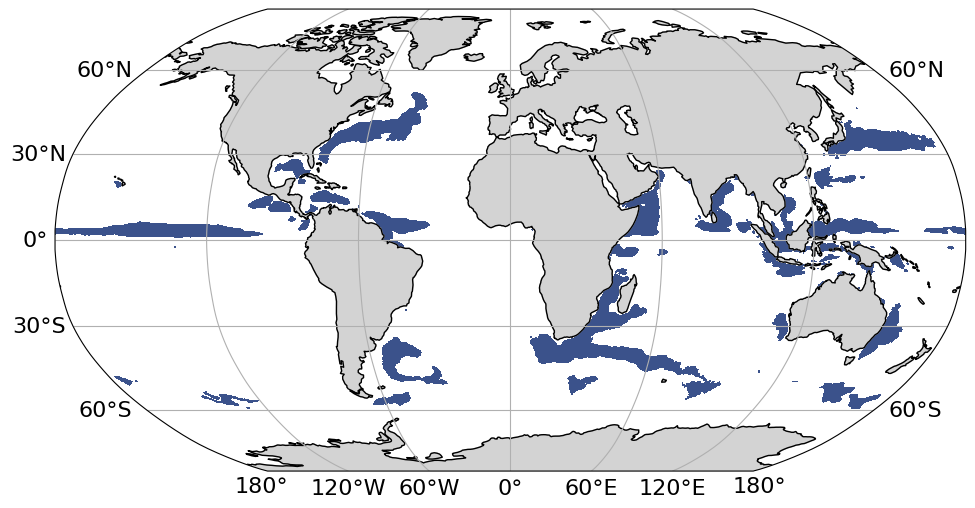

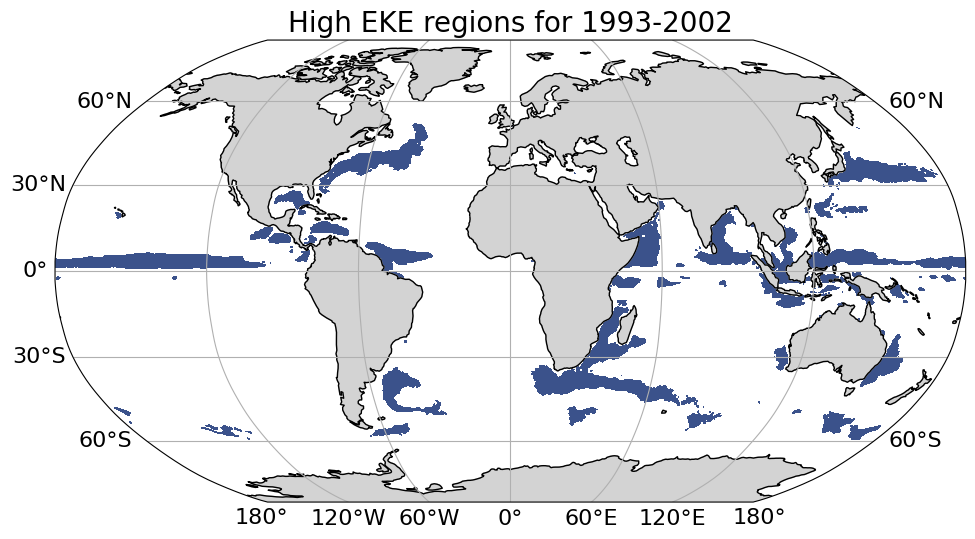

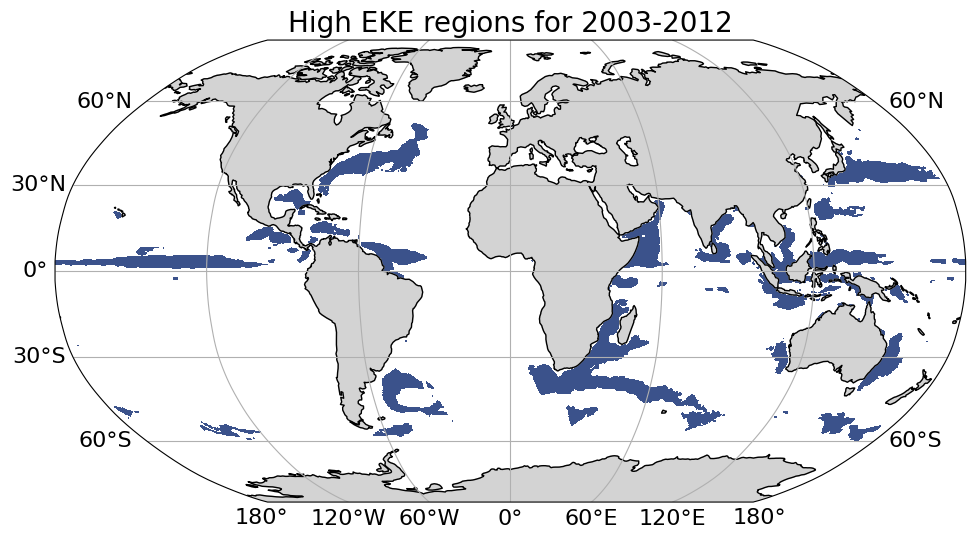

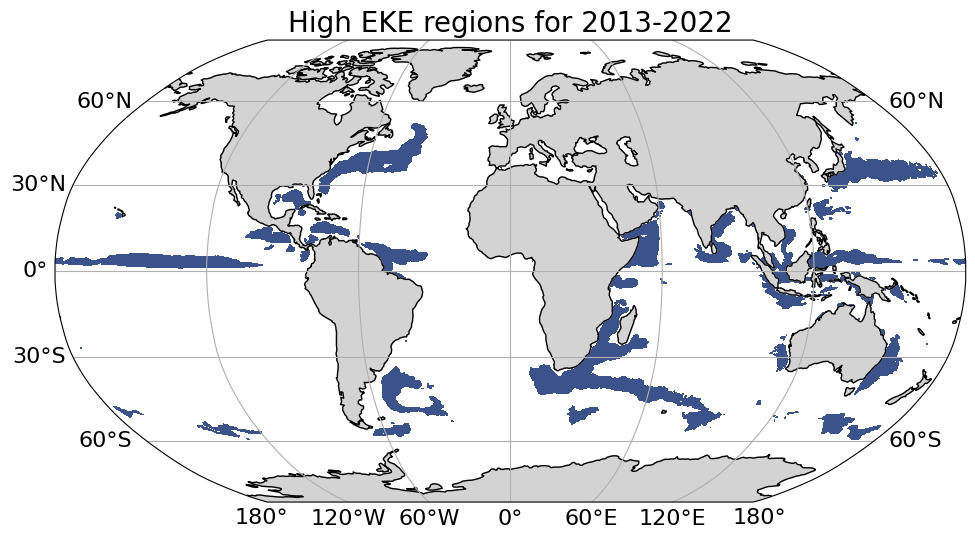

In [9]:
#plot the mean EKE field regions with EKE > 90th percentile
import matplotlib as mpl
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature

longitude, latitude = np.meshgrid(ds.longitude, ds.latitude)


plt.figure(figsize=(50, 6))

#bounds = np.arange(0, 400, 25)
cmp = plt.get_cmap('viridis')
#norm = mpl.colors.BoundaryNorm(bounds, cmp.N)

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}

contour_plot = ax.contourf(longitude, latitude, region, cmap=cmp, transform=ccrs.PlateCarree())

plt.show()

#do the same for the decades

plt.figure(figsize=(50, 6))

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}

contour_plot = ax.contourf(longitude, latitude, region_1, cmap=cmp, transform=ccrs.PlateCarree())

plt.title('High EKE regions for 1993-2002', fontsize=20)
plt.show()


plt.figure(figsize=(50, 6))

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}

contour_plot = ax.contourf(longitude, latitude, region_2, cmap=cmp, transform=ccrs.PlateCarree())

plt.title('High EKE regions for 2003-2012', fontsize=20)
plt.show()

plt.figure(figsize=(50, 6))

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}

contour_plot = ax.contourf(longitude, latitude, region_3, cmap=cmp, transform=ccrs.PlateCarree())

plt.title('High EKE regions for 2013-2022', fontsize=20)
plt.show()

Contour path coordinates (longitude, latitude):
[[-179.875    1.75 ]
 [-179.75     1.875]
 [-179.625    2.   ]
 ...
 [-179.625    4.   ]
 [-179.75     4.125]
 [-179.875    4.25 ]]
Contour path coordinates (longitude, latitude):
[[179.875   4.25 ]
 [179.625   4.25 ]
 [179.375   4.25 ]
 [179.125   4.25 ]
 [178.875   4.25 ]
 [178.625   4.25 ]
 [178.5     4.375]
 [178.375   4.5  ]
 [178.125   4.5  ]
 [177.875   4.5  ]
 [177.625   4.5  ]
 [177.375   4.5  ]
 [177.125   4.5  ]
 [176.875   4.5  ]
 [176.625   4.5  ]
 [176.375   4.5  ]
 [176.25    4.625]
 [176.125   4.75 ]
 [175.875   4.75 ]
 [175.625   4.75 ]
 [175.375   4.75 ]
 [175.125   4.75 ]
 [174.875   4.75 ]
 [174.75    4.625]
 [174.625   4.5  ]
 [174.375   4.5  ]
 [174.125   4.5  ]
 [173.875   4.5  ]
 [173.625   4.5  ]
 [173.375   4.5  ]
 [173.125   4.5  ]
 [172.875   4.5  ]
 [172.625   4.5  ]
 [172.375   4.5  ]
 [172.125   4.5  ]
 [171.875   4.5  ]
 [171.625   4.5  ]
 [171.375   4.5  ]
 [171.25    4.375]
 [171.125   4.25 ]
 [170.875   

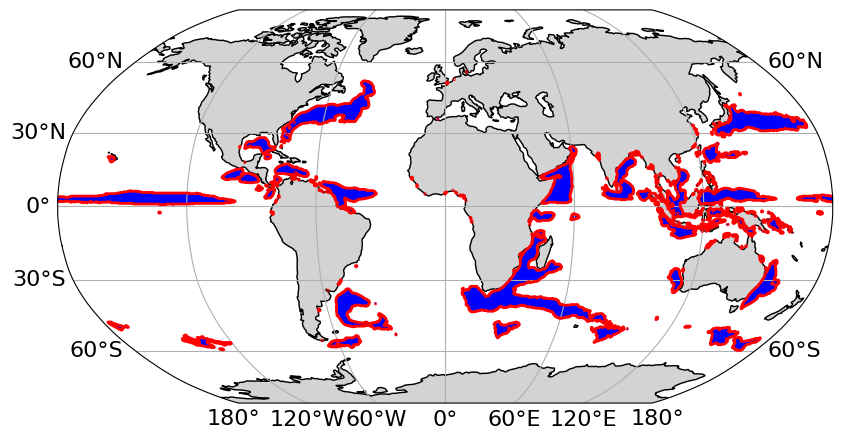

Contour path coordinates (longitude, latitude):
[[179.875  -2.   ]
 [179.625  -2.   ]
 [179.375  -2.   ]
 [179.125  -2.   ]
 [178.875  -2.   ]
 [178.75   -2.125]
 [178.875  -2.25 ]
 [179.     -2.375]
 [179.     -2.625]
 [179.125  -2.75 ]
 [179.375  -2.75 ]
 [179.5    -2.875]
 [179.625  -3.   ]
 [179.75   -2.875]
 [179.75   -2.625]
 [179.625  -2.5  ]
 [179.5    -2.375]
 [179.625  -2.25 ]
 [179.875  -2.25 ]]
Contour path coordinates (longitude, latitude):
[[-179.875    1.   ]
 [-179.625    1.   ]
 [-179.5      1.125]
 ...
 [-179.5      4.375]
 [-179.625    4.5  ]
 [-179.875    4.5  ]]
Contour path coordinates (longitude, latitude):
[[179.875   4.5  ]
 [179.75    4.625]
 [179.625   4.75 ]
 ...
 [179.375   1.   ]
 [179.625   1.   ]
 [179.875   1.   ]]
Contour path coordinates (longitude, latitude):
[[170.375 -59.75 ]
 [170.625 -59.75 ]
 [170.875 -59.75 ]
 [171.125 -59.75 ]
 [171.375 -59.75 ]
 [171.625 -59.75 ]
 [171.75  -59.625]
 [171.75  -59.375]
 [171.875 -59.25 ]
 [172.    -59.125]
 [17

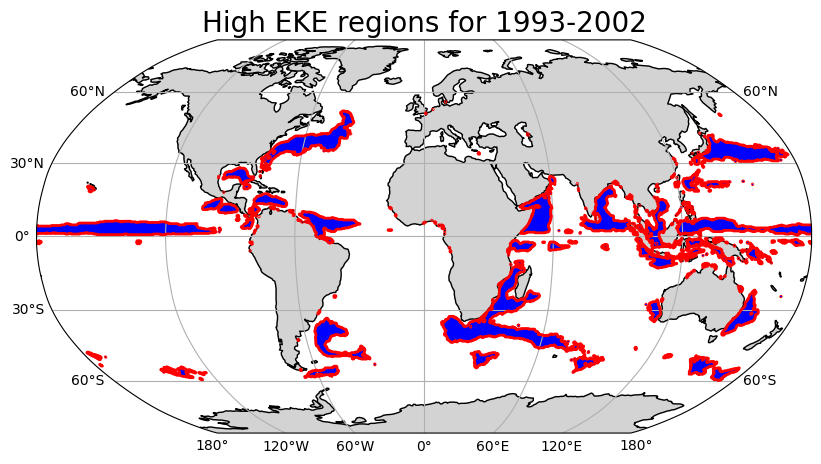

Contour path coordinates (longitude, latitude):
[[-179.875    2.25 ]
 [-179.625    2.25 ]
 [-179.375    2.25 ]
 ...
 [-179.375    3.75 ]
 [-179.625    3.75 ]
 [-179.875    3.75 ]]
Contour path coordinates (longitude, latitude):
[[179.875   3.75 ]
 [179.75    3.875]
 [179.625   4.   ]
 [179.375   4.   ]
 [179.125   4.   ]
 [178.875   4.   ]
 [178.625   4.   ]
 [178.375   4.   ]
 [178.125   4.   ]
 [177.875   4.   ]
 [177.625   4.   ]
 [177.5     4.125]
 [177.375   4.25 ]
 [177.125   4.25 ]
 [176.875   4.25 ]
 [176.625   4.25 ]
 [176.5     4.375]
 [176.375   4.5  ]
 [176.125   4.5  ]
 [175.875   4.5  ]
 [175.625   4.5  ]
 [175.375   4.5  ]
 [175.25    4.375]
 [175.125   4.25 ]
 [175.      4.125]
 [174.875   4.   ]
 [174.75    3.875]
 [174.75    3.625]
 [174.75    3.375]
 [174.875   3.25 ]
 [175.      3.125]
 [175.125   3.   ]
 [175.25    2.875]
 [175.375   2.75 ]
 [175.625   2.75 ]
 [175.875   2.75 ]
 [176.125   2.75 ]
 [176.375   2.75 ]
 [176.625   2.75 ]
 [176.875   2.75 ]
 [177.      

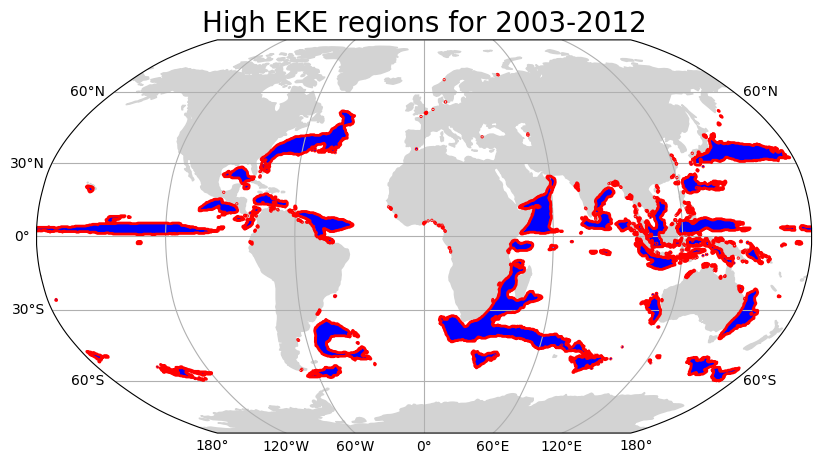

Contour path coordinates (longitude, latitude):
[[-179.875    2.   ]
 [-179.625    2.   ]
 [-179.5      2.125]
 [-179.625    2.25 ]
 [-179.875    2.25 ]]
Contour path coordinates (longitude, latitude):
[[179.875   2.25 ]
 [179.75    2.125]
 [179.875   2.   ]]
Contour path coordinates (longitude, latitude):
[[-179.875    2.5  ]
 [-179.625    2.5  ]
 [-179.375    2.5  ]
 ...
 [-179.375    4.5  ]
 [-179.625    4.5  ]
 [-179.875    4.5  ]]
Contour path coordinates (longitude, latitude):
[[179.875   4.5  ]
 [179.625   4.5  ]
 [179.5     4.375]
 [179.375   4.25 ]
 [179.125   4.25 ]
 [178.875   4.25 ]
 [178.625   4.25 ]
 [178.375   4.25 ]
 [178.125   4.25 ]
 [177.875   4.25 ]
 [177.625   4.25 ]
 [177.375   4.25 ]
 [177.125   4.25 ]
 [176.875   4.25 ]
 [176.625   4.25 ]
 [176.375   4.25 ]
 [176.125   4.25 ]
 [175.875   4.25 ]
 [175.625   4.25 ]
 [175.5     4.125]
 [175.375   4.   ]
 [175.25    3.875]
 [175.25    3.625]
 [175.375   3.5  ]
 [175.5     3.375]
 [175.625   3.25 ]
 [175.75    3.125]

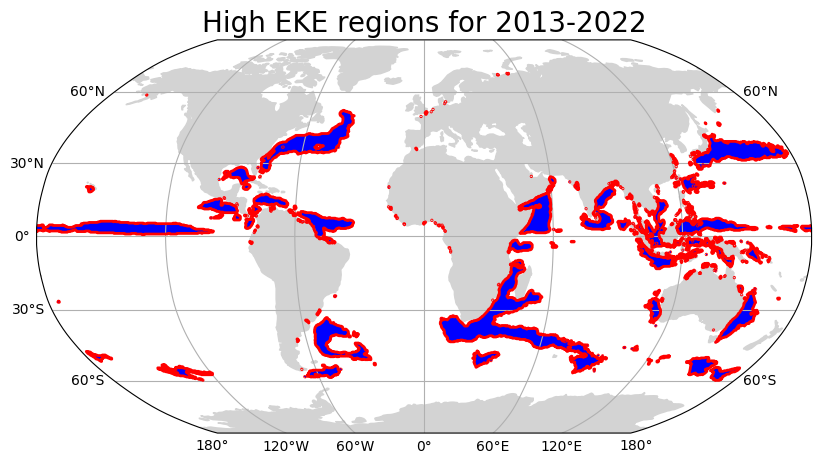

In [10]:
#plot a contour around the high energy regions
import matplotlib.colors as mcolors


# Replace NaN values with 0
region = np.nan_to_num(region, nan=0)

# Create a custom colormap
colors = ['white', 'blue']
cmap = mcolors.ListedColormap(colors)

#plot the small region
plt.figure(figsize=(10, 6))

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}

contour_plot = ax.contourf(longitude, latitude, region, cmap = cmap,transform=ccrs.PlateCarree())
contour_line = ax.contour(longitude, latitude, region, levels=[0.5], colors='red', linewidths=2, transform=ccrs.PlateCarree())

# Access the contour paths to get the coordinates
contour_paths = contour_line.collections[0].get_paths()

# Extract and print the coordinates of the contour paths
for path in contour_paths:
    coordinates = path.vertices
    print("Contour path coordinates (longitude, latitude):")
    print(coordinates)

plt.show()

#do the same for the decades
region_1 = np.nan_to_num(region_1, nan=0)

plt.figure(figsize=(10, 6))

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False

contour_plot = ax.contourf(longitude, latitude, region_1, cmap = cmap,transform=ccrs.PlateCarree())
contour_line_1 = ax.contour(longitude, latitude, region_1, levels=[0.5], colors='red', linewidths=2, transform=ccrs.PlateCarree())
plt.title('High EKE regions for 1993-2002', fontsize=20)

# Access the contour paths to get the coordinates
contour_paths_1 = contour_line_1.collections[0].get_paths()

# Extract and print the coordinates of the contour paths
for path in contour_paths_1:
    coordinates = path.vertices
    print("Contour path coordinates (longitude, latitude):")
    print(coordinates)

plt.show()


region_2 = np.nan_to_num(region_2, nan=0)

plt.figure(figsize=(10, 6))

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)

gl.top_labels = False
gl.right_labels = False

contour_plot = ax.contourf(longitude, latitude, region_2, cmap = cmap,transform=ccrs.PlateCarree())
contour_line_2 = ax.contour(longitude, latitude, region_2, levels=[0.5], colors='red', linewidths=2, transform=ccrs.PlateCarree())
plt.title('High EKE regions for 2003-2012', fontsize=20)

# Access the contour paths to get the coordinates
contour_paths_2 = contour_line_2.collections[0].get_paths()

# Extract and print the coordinates of the contour paths
for path in contour_paths_2:
    coordinates = path.vertices
    print("Contour path coordinates (longitude, latitude):")
    print(coordinates)

plt.show()



region_3 = np.nan_to_num(region_3, nan=0)

plt.figure(figsize=(10, 6))

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)

gl.top_labels = False
gl.right_labels = False

contour_plot = ax.contourf(longitude, latitude, region_3, cmap = cmap,transform=ccrs.PlateCarree())
contour_line_3 = ax.contour(longitude, latitude, region_3, levels=[0.5], colors='red', linewidths=2, transform=ccrs.PlateCarree())

plt.title('High EKE regions for 2013-2022', fontsize=20)

# Access the contour paths to get the coordinates
contour_paths_3 = contour_line_3.collections[0].get_paths()

# Extract and print the coordinates of the contour paths
for path in contour_paths_3:
    coordinates = path.vertices
    print("Contour path coordinates (longitude, latitude):")
    print(coordinates)

In [11]:
from shapely.geometry import Polygon
from pyproj import Proj, transform

# Access the contour paths to get the coordinates
contour_paths = contour_line.collections[0].get_paths()

# Initialize a list to store polygons
polygons = []

# Define the projection for area preservation (e.g., Equal Earth)
projection = ccrs.EqualEarth()

# Convert contour paths to polygons and reproject coordinates
for path in contour_paths:
    coordinates = path.vertices
    # Reproject the coordinates to Equal Earth projection
    projected_coords = []
    for lon, lat in coordinates:
        x, y = projection.transform_point(lon, lat, ccrs.PlateCarree())  # Transform to Equal Earth
        projected_coords.append((x, y))
    
    # Create a Shapely polygon from the projected coordinates
    polygon = Polygon(projected_coords)
    polygons.append(polygon)

# Calculate the area for each polygon (in square kilometers)
for i, polygon in enumerate(polygons):
    area = polygon.area  # Calculate the area of the individual polygon in square degrees
    print(f"Area of contour {i + 1}: {area} square degrees")

    # Convert square degrees to square kilometers
    # 1 degree^2 = 12355.6 km^2 at the equator (approximation)
    area_km2 = area * 12355.6  # Simple approximation based on the equator
    print(f"Area of contour {i + 1}: {area_km2} square kilometers")

#do the same for the decades

# Access the contour paths to get the coordinates
contour_paths_1 = contour_line_1.collections[0].get_paths()
contour_paths_2 = contour_line_2.collections[0].get_paths()
contour_paths_3 = contour_line_3.collections[0].get_paths()

# Initialize a list to store polygons
polygons_1 = []
polygons_2 = []
polygons_3 = []

# Convert contour paths to polygons and reproject coordinates
for path in contour_paths_1:
    coordinates = path.vertices
    # Reproject the coordinates to Equal Earth projection
    projected_coords = []
    for lon, lat in coordinates:
        x, y = projection.transform_point(lon, lat, ccrs.PlateCarree())  # Transform to Equal Earth
        projected_coords.append((x, y))
    
    # Create a Shapely polygon from the projected coordinates
    polygon = Polygon(projected_coords)
    polygons_1.append(polygon)

for path in contour_paths_2:
    coordinates = path.vertices
    # Reproject the coordinates to Equal Earth projection
    projected_coords = []
    for lon, lat in coordinates:
        x, y = projection.transform_point(lon, lat, ccrs.PlateCarree())  # Transform to Equal Earth
        projected_coords.append((x, y))
    
    # Create a Shapely polygon from the projected coordinates
    polygon = Polygon(projected_coords)
    polygons_2.append(polygon) 

for path in contour_paths_3:
    coordinates = path.vertices
    # Reproject the coordinates to Equal Earth projection
    projected_coords = []
    for lon, lat in coordinates:
        x, y = projection.transform_point(lon, lat, ccrs.PlateCarree())  # Transform to Equal Earth
        projected_coords.append((x, y))
    
    # Create a Shapely polygon from the projected coordinates
    polygon = Polygon(projected_coords)
    polygons_3.append(polygon)

# Calculate the area for each polygon (in square kilometers)
for i, polygon in enumerate(polygons_1):
    area = polygon.area  # Calculate the area of the individual polygon in square degrees
    print(f"Area of contour {i + 1}: {area} square degrees")

    # Convert square degrees to square kilometers
    # 1 degree^2 = 12355.6 km^2 at the equator (approximation)
    area_km2 = area * 12355.6  # Simple approximation based on the equator
    print(f"Area of contour {i + 1}: {area_km2} square kilometers")

for i, polygon in enumerate(polygons_2):
    area = polygon.area  # Calculate the area of the individual polygon in square degrees
    print(f"Area of contour {i + 1}: {area} square degrees")

    # Convert square degrees to square kilometers
    # 1 degree^2 = 12355.6 km^2 at the equator (approximation)
    area_km2 = area * 12355.6  # Simple approximation based on the equator
    print(f"Area of contour {i + 1}: {area_km2} square kilometers")

for i, polygon in enumerate(polygons_3):
    area = polygon.area  # Calculate the area of the individual polygon in square degrees
    print(f"Area of contour {i + 1}: {area} square degrees")

    # Convert square degrees to square kilometers
    # 1 degree^2 = 12355.6 km^2 at the equator (approximation)
    area_km2 = area * 12355.6  # Simple approximation based on the equator
    print(f"Area of contour {i + 1}: {area_km2} square kilometers")

Area of contour 1: 3510548282330.803 square degrees
Area of contour 1: 4.337493035716647e+16 square kilometers
Area of contour 2: 355728570669.25464 square degrees
Area of contour 2: 4395239927761042.5 square kilometers
Area of contour 3: 276160969053.12964 square degrees
Area of contour 3: 3412134469232848.5 square kilometers
Area of contour 4: 4571426016.532084 square degrees
Area of contour 4: 56482711289863.83 square kilometers
Area of contour 5: 248477301842.4016 square degrees
Area of contour 5: 3070086150643977.5 square kilometers
Area of contour 6: 339596027023.5488 square degrees
Area of contour 6: 4195912671492160.0 square kilometers
Area of contour 7: 535059253114.21387 square degrees
Area of contour 7: 6610978107777981.0 square kilometers
Area of contour 8: 212190948.3887812 square degrees
Area of contour 8: 2621746481912.425 square kilometers
Area of contour 9: 42623376309.768486 square degrees
Area of contour 9: 526637388332975.5 square kilometers
Area of contour 10: 4274

Contour with area 5852307.16 km² is included.
Contour with area 606968.85 km² is included.
Contour with area 1030148.15 km² is included.
Contour with area 12355.60 km² is excluded.
Contour with area 1431705.15 km² is included.
Contour with area 1248687.82 km² is included.
Contour with area 1575339.00 km² is included.
Contour with area 772.23 km² is excluded.
Contour with area 203867.40 km² is excluded.
Contour with area 1455644.12 km² is included.
Contour with area 772.23 km² is excluded.
Contour with area 1167604.20 km² is included.
Contour with area 3088.90 km² is excluded.
Contour with area 3088.90 km² is excluded.
Contour with area 1544.45 km² is excluded.
Contour with area 259467.60 km² is excluded.
Contour with area 27027.88 km² is excluded.
Contour with area 5723731.70 km² is included.
Contour with area 4633.35 km² is excluded.
Contour with area 772.23 km² is excluded.
Contour with area 11583.38 km² is excluded.
Contour with area 16988.95 km² is excluded.
Contour with area 39287

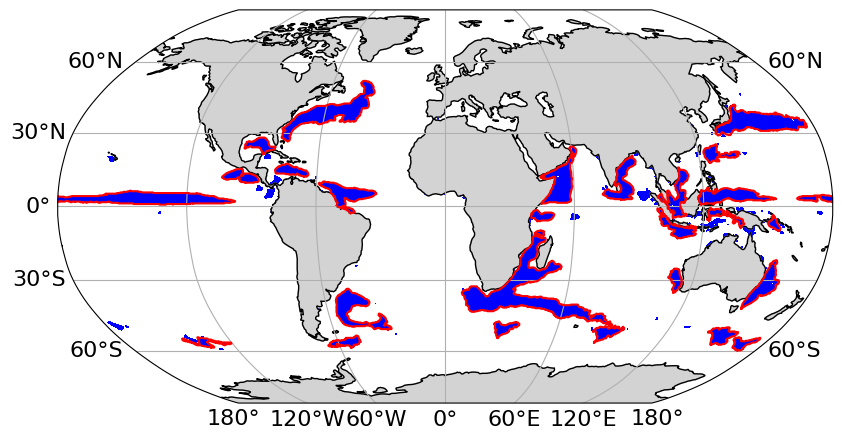

Contour with area 13900.05 km² is excluded.
Contour with area 5923351.86 km² is included.
Contour with area 5565039.46 km² is included.
Contour with area 917403.30 km² is included.
Contour with area 11583.38 km² is excluded.
Contour with area 525113.00 km² is included.
Contour with area 4633.35 km² is excluded.
Contour with area 772.23 km² is excluded.
Contour with area 1115092.90 km² is included.
Contour with area 30889.00 km² is excluded.
Contour with area 1556033.38 km² is included.
Contour with area 97300.35 km² is excluded.
Contour with area 60233.55 km² is excluded.
Contour with area 3861.12 km² is excluded.
Contour with area 772.23 km² is excluded.
Contour with area 3088.90 km² is excluded.
Contour with area 90350.32 km² is excluded.
Contour with area 772.23 km² is excluded.
Contour with area 4633.35 km² is excluded.
Contour with area 4633.35 km² is excluded.
Contour with area 1101192.85 km² is included.
Contour with area 11583.38 km² is excluded.
Contour with area 4633.35 km² i

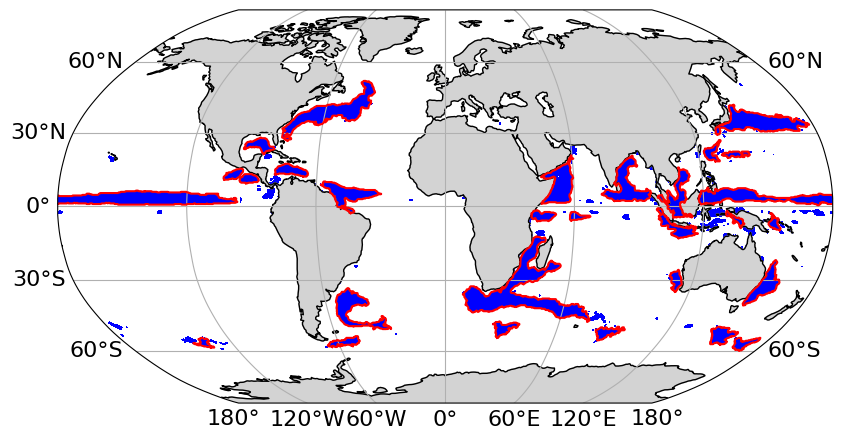

Contour with area 8031526.11 km² is included.
Contour with area 142475.51 km² is excluded.
Contour with area 1093470.60 km² is included.
Contour with area 27800.10 km² is excluded.
Contour with area 3088.90 km² is excluded.
Contour with area 2316.68 km² is excluded.
Contour with area 1544.45 km² is excluded.
Contour with area 1569933.43 km² is included.
Contour with area 1313554.73 km² is included.
Contour with area 4633.35 km² is excluded.
Contour with area 2316.68 km² is excluded.
Contour with area 30889.00 km² is excluded.
Contour with area 1699667.23 km² is included.
Contour with area 11583.38 km² is excluded.
Contour with area 772.23 km² is excluded.
Contour with area 50441737.00 km² is included.
Contour with area 19305.62 km² is excluded.
Contour with area 772.23 km² is excluded.
Contour with area 772.23 km² is excluded.
Contour with area 772.23 km² is excluded.
Contour with area 23166.75 km² is excluded.
Contour with area 2316.68 km² is excluded.
Contour with area 1276487.93 km²

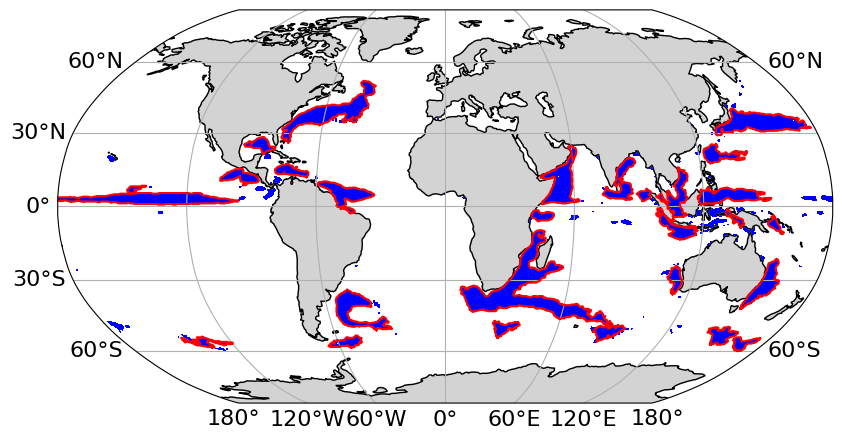

Contour with area 1158.34 km² is excluded.
Contour with area 386.11 km² is excluded.
Contour with area 5580870.08 km² is included.
Contour with area 128575.46 km² is excluded.
Contour with area 772.23 km² is excluded.
Contour with area 1065670.50 km² is included.
Contour with area 12355.60 km² is excluded.
Contour with area 2316.68 km² is excluded.
Contour with area 2094274.20 km² is included.
Contour with area 2316.68 km² is excluded.
Contour with area 1248687.82 km² is included.
Contour with area 1544.45 km² is excluded.
Contour with area 1651789.28 km² is included.
Contour with area 51119750.55 km² is included.
Contour with area 772.23 km² is excluded.
Contour with area 3088.90 km² is excluded.
Contour with area 772.23 km² is excluded.
Contour with area 1544.45 km² is excluded.
Contour with area 2316.68 km² is excluded.
Contour with area 1189226.50 km² is included.
Contour with area 13900.05 km² is excluded.
Contour with area 6950.03 km² is excluded.
Contour with area 6950.03 km² is

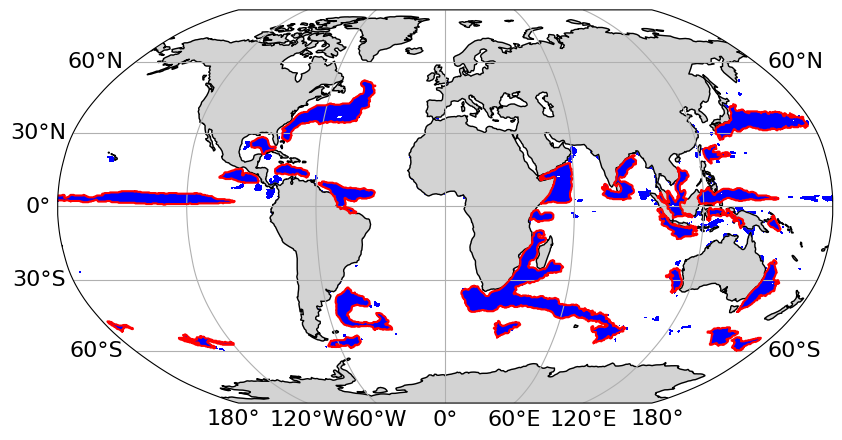

In [12]:
from matplotlib.path import Path


reference_area_km2 = 4 * 10**5  
# Define the latitude range near the equator to exclude
equator_lat_range = (-5, 5)  # ±5° latitude


plt.figure(figsize=(10, 6))

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}

# Plot the contour
contour_plot = ax.contourf(longitude, latitude, region, cmap=cmap, transform=ccrs.PlateCarree())
#contour_line = ax.contour(longitude, latitude, region, levels=[0.5], colors='red', linewidths=2, transform=ccrs.PlateCarree())

# Access the contour paths to get the coordinates
contour_paths = contour_line.collections[0].get_paths()

# Filter out the paths smaller than the reference area
filtered_paths = []
for path in contour_paths:
    # Get the path vertices
    vertices = path.vertices
    # Calculate the area of the contour by using the path's bounding box
    min_lon, min_lat = np.min(vertices, axis=0)
    max_lon, max_lat = np.max(vertices, axis=0)
    
    # Approximate the area (bounding box approach) in square degrees
    area_deg2 = (max_lon - min_lon) * (max_lat - min_lat)  # area in degrees^2
    
    # Convert area in square degrees to square kilometers (approximation)
    area_km2 = area_deg2 * 12355.6  

    # Check if the contour is within the specified latitude range near the equator
    #if np.any((vertices[:, 1] >= equator_lat_range[0]) & (vertices[:, 1] <= equator_lat_range[1])):
     #   print(f"Contour near the equator (excluded).")
      #  continue  # Skip this contour if it's near the equator
    
    if area_km2 >= reference_area_km2:
        filtered_paths.append(path)
        print(f"Contour with area {area_km2:.2f} km² is included.")
    else:
        print(f"Contour with area {area_km2:.2f} km² is excluded.")

# Plot only the remaining large contours
for path in filtered_paths:
    coords = path.vertices
    ax.plot(coords[:, 0], coords[:, 1], color='red', linewidth=1.5, transform=ccrs.PlateCarree())

plt.show()

# do the same for the decades

plt.figure(figsize=(10, 6))

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}

# Plot the contour
contour_plot_1 = ax.contourf(longitude, latitude, region_1, cmap=cmap, transform=ccrs.PlateCarree())


# Filter out the paths smaller than the reference area
filtered_paths_1 = []
for path in contour_paths_1:
    # Get the path vertices
    vertices_1 = path.vertices
    # Calculate the area of the contour by using the path's bounding box
    min_lon, min_lat = np.min(vertices_1, axis=0)
    max_lon, max_lat = np.max(vertices_1, axis=0)
    
    # Approximate the area (bounding box approach) in square degrees
    area_deg2 = (max_lon - min_lon) * (max_lat - min_lat)  # area in degrees^2
    
    # Convert area in square degrees to square kilometers (approximation)
    area_km2 = area_deg2 * 12355.6  

    # Check if the contour is within the specified latitude range near the equator
    if np.any((vertices[:, 1] >= equator_lat_range[0]) & (vertices[:, 1] <= equator_lat_range[1])):
        print(f"Contour near the equator (excluded).")
        continue  # Skip this contour if it's near the equator    
    
    if area_km2 >= reference_area_km2:
        filtered_paths_1.append(path)
        print(f"Contour with area {area_km2:.2f} km² is included.")
    else:
        print(f"Contour with area {area_km2:.2f} km² is excluded.")

# Plot only the remaining large contours
for path in filtered_paths_1:
    coords = path.vertices
    ax.plot(coords[:, 0], coords[:, 1], color='red', linewidth=1.5, transform=ccrs.PlateCarree())

plt.show()


plt.figure(figsize=(10, 6))

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}

# Plot the contour
contour_plot_2 = ax.contourf(longitude, latitude, region_2, cmap=cmap, transform=ccrs.PlateCarree())

# Access the contour paths to get the coordinates
contour_paths_2 = contour_line_2.collections[0].get_paths()

# Filter out the paths smaller than the reference area
filtered_paths_2 = []
for path in contour_paths_2:
    # Get the path vertices
    vertices_2 = path.vertices
    # Calculate the area of the contour by using the path's bounding box
    min_lon, min_lat = np.min(vertices_2, axis=0)
    max_lon, max_lat = np.max(vertices_2, axis=0)
    
    # Approximate the area (bounding box approach) in square degrees
    area_deg2 = (max_lon - min_lon) * (max_lat - min_lat)  # area in degrees^2
    
    # Convert area in square degrees to square kilometers (approximation)
    area_km2 = area_deg2 * 12355.6  

    # Check if the contour is within the specified latitude range near the equator
    if np.any((vertices[:, 1] >= equator_lat_range[0]) & (vertices[:, 1] <= equator_lat_range[1])):
        print(f"Contour near the equator (excluded).")
        continue  # Skip this contour if it's near the equator 

    if area_km2 >= reference_area_km2:
        filtered_paths_2.append(path)
        print(f"Contour with area {area_km2:.2f} km² is included.")
    else:
        print(f"Contour with area {area_km2:.2f} km² is excluded.")


# Plot only the remaining large contours
for path in filtered_paths_2:
    coords = path.vertices
    ax.plot(coords[:, 0], coords[:, 1], color='red', linewidth=1.5, transform=ccrs.PlateCarree())

plt.show()




plt.figure(figsize=(10, 6))

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}

# Plot the contour
contour_plot_3 = ax.contourf(longitude, latitude, region_3, cmap=cmap, transform=ccrs.PlateCarree())

# Access the contour paths to get the coordinates
contour_paths_3 = contour_line_3.collections[0].get_paths()

# Filter out the paths smaller than the reference area
filtered_paths_3 = []

for path in contour_paths_3:
    # Get the path vertices
    vertices_3 = path.vertices
    # Calculate the area of the contour by using the path's bounding box
    min_lon, min_lat = np.min(vertices_3, axis=0)
    max_lon, max_lat = np.max(vertices_3, axis=0)
    
    # Approximate the area (bounding box approach) in square degrees
    area_deg2 = (max_lon - min_lon) * (max_lat - min_lat)  # area in degrees^2
    
    # Convert area in square degrees to square kilometers (approximation)
    area_km2 = area_deg2 * 12355.6  
    
    # Check if the contour is within the specified latitude range near the equator
    if np.any((vertices[:, 1] >= equator_lat_range[0]) & (vertices[:, 1] <= equator_lat_range[1])):
        print(f"Contour near the equator (excluded).")
        continue  # Skip this contour if it's near the equator 
    
    if area_km2 >= reference_area_km2:
        filtered_paths_3.append(path)
        print(f"Contour with area {area_km2:.2f} km² is included.")
    else:
        print(f"Contour with area {area_km2:.2f} km² is excluded.")

# Plot only the remaining large contours
for path in filtered_paths_3:
    coords = path.vertices
    ax.plot(coords[:, 0], coords[:, 1], color='red', linewidth=1.5, transform=ccrs.PlateCarree())

plt.show()

In [13]:
# Define the geographical bounds for the currents
currents = {
    "Gulf Stream": {"lat_range": (30, 50), "lon_range": (-80, -50)}, 
    "Agulhas Current": {"lat_range": (-40, -30), "lon_range": (10, 40)},  
    "Kuroshio Extension": {"lat_range": (30, 45), "lon_range": (120, 160)},  
    "GWSE" : {"lat_range": (0, 30), "lon_range": (30, 60)},
    "Loop Current": {"lat_range": (18, 32), "lon_range": (-92, -78)},
    "BMC": {"lat_range": (-50, -30), "lon_range": (-60, 0)},
    "EAC": {"lat_range": (-40, -30), "lon_range": (140, 170)},
}

# Initialize a dictionary to store the coordinates for each current
currents_coords = {current_name: [] for current_name in currents}
currents_coords_1 = {current_name: [] for current_name in currents}
currents_coords_2 = {current_name: [] for current_name in currents}
currents_coords_3 = {current_name: [] for current_name in currents}

# Filter the paths and extract coordinates for each region
it = 0
#for path in contour_line.collections[0].get_paths():
for path in filtered_paths:
    coords = path.vertices

    # Loop over each current's bounds
    for current_name, bounds in currents.items():
        lat_in_range = (coords[:, 1] >= bounds["lat_range"][0]) & (coords[:, 1] <= bounds["lat_range"][1])
        lon_in_range = (coords[:, 0] >= bounds["lon_range"][0]) & (coords[:, 0] <= bounds["lon_range"][1])
        
        # If any of the contour's coordinates fall within the region of interest, store the coordinates
        if np.any(lat_in_range & lon_in_range):
            it += 1
            currents_coords[current_name].append(coords)
            print(f"Contour coordinates for {current_name} extracted.")
            break  # Stop checking other currents once it's labeled

# Optionally: Convert the list of coordinates to numpy arrays for each current
for current_name in currents_coords:
    if currents_coords[current_name]:
        currents_coords[current_name] = np.array(currents_coords[current_name][0])  # Take the first match
    else:
        currents_coords[current_name] = None  # No matching contour found for this current
print(it)


#do the same for the decades

it = 0
for path in filtered_paths_1:
    coords = path.vertices

    # Loop over each current's bounds
    for current_name, bounds in currents.items():
        lat_in_range = (coords[:, 1] >= bounds["lat_range"][0]) & (coords[:, 1] <= bounds["lat_range"][1])
        lon_in_range = (coords[:, 0] >= bounds["lon_range"][0]) & (coords[:, 0] <= bounds["lon_range"][1])
        
        # If any of the contour's coordinates fall within the region of interest, store the coordinates
        if np.any(lat_in_range & lon_in_range):
            it += 1
            currents_coords_1[current_name].append(coords)
            print(f"Contour coordinates for {current_name} extracted.")
            break  # Stop checking other currents once it's labeled

# Optionally: Convert the list of coordinates to numpy arrays for each current
for current_name in currents_coords_1:
    if currents_coords_1[current_name]:
        currents_coords_1[current_name] = np.array(currents_coords_1[current_name][0])  # Take the first match
    else:
        currents_coords_1[current_name] = None  # No matching contour found for this current

print(it)


it = 0

for path in filtered_paths_2:
    coords = path.vertices

    # Loop over each current's bounds
    for current_name, bounds in currents.items():
        lat_in_range = (coords[:, 1] >= bounds["lat_range"][0]) & (coords[:, 1] <= bounds["lat_range"][1])
        lon_in_range = (coords[:, 0] >= bounds["lon_range"][0]) & (coords[:, 0] <= bounds["lon_range"][1])
        
        # If any of the contour's coordinates fall within the region of interest, store the coordinates
        if np.any(lat_in_range & lon_in_range):
            it += 1
            currents_coords_2[current_name].append(coords)
            print(f"Contour coordinates for {current_name} extracted.")
            break  # Stop checking other currents once it's labeled

# Optionally: Convert the list of coordinates to numpy arrays for each current
for current_name in currents_coords_2:
    if currents_coords_2[current_name]:
        currents_coords_2[current_name] = np.array(currents_coords_2[current_name][0])  # Take the first match
    else:
        currents_coords_2[current_name] = None  # No matching contour found for this current

print(it)


it = 0

for path in filtered_paths_3:
    coords = path.vertices

    # Loop over each current's bounds
    for current_name, bounds in currents.items():
        lat_in_range = (coords[:, 1] >= bounds["lat_range"][0]) & (coords[:, 1] <= bounds["lat_range"][1])
        lon_in_range = (coords[:, 0] >= bounds["lon_range"][0]) & (coords[:, 0] <= bounds["lon_range"][1])
        
        # If any of the contour's coordinates fall within the region of interest, store the coordinates
        if np.any(lat_in_range & lon_in_range):
            it += 1
            currents_coords_3[current_name].append(coords)
            print(f"Contour coordinates for {current_name} extracted.")
            break  # Stop checking other currents once it's labeled

# Optionally: Convert the list of coordinates to numpy arrays for each current
for current_name in currents_coords_3:
    if currents_coords_3[current_name]:
        currents_coords_3[current_name] = np.array(currents_coords_3[current_name][0])  # Take the first match
    else:
        currents_coords_3[current_name] = None  # No matching contour found for this current

print(it)

Contour coordinates for BMC extracted.
Contour coordinates for Agulhas Current extracted.
Contour coordinates for EAC extracted.
Contour coordinates for GWSE extracted.
Contour coordinates for Loop Current extracted.
Contour coordinates for Gulf Stream extracted.
Contour coordinates for Kuroshio Extension extracted.
7
Contour coordinates for BMC extracted.
Contour coordinates for Agulhas Current extracted.
Contour coordinates for EAC extracted.
Contour coordinates for GWSE extracted.
Contour coordinates for Loop Current extracted.
Contour coordinates for Gulf Stream extracted.
Contour coordinates for Kuroshio Extension extracted.
7
Contour coordinates for Agulhas Current extracted.
Contour coordinates for BMC extracted.
Contour coordinates for EAC extracted.
Contour coordinates for GWSE extracted.
Contour coordinates for Loop Current extracted.
Contour coordinates for Gulf Stream extracted.
Contour coordinates for Kuroshio Extension extracted.
7
Contour coordinates for Agulhas Current 

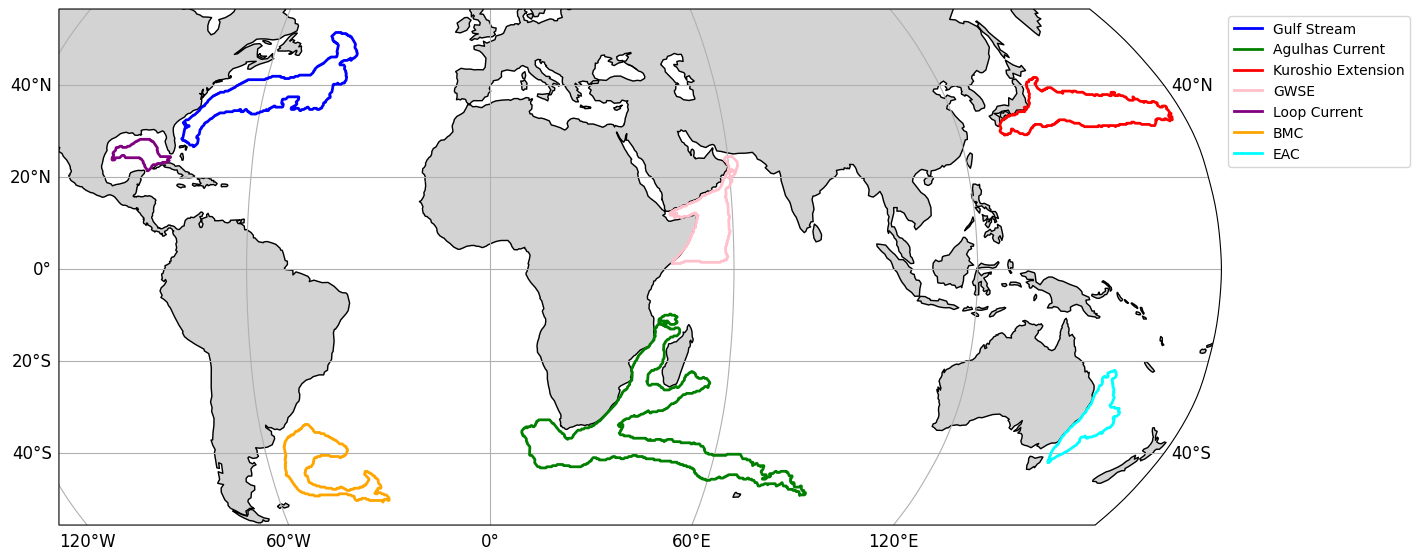

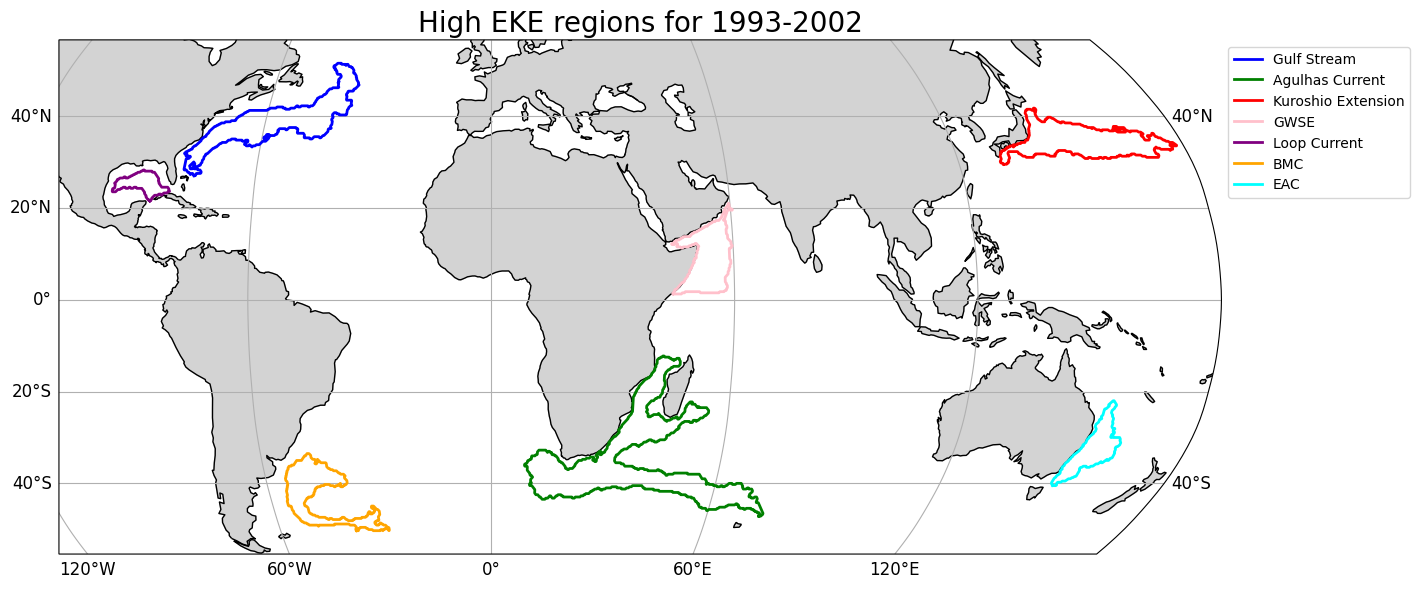

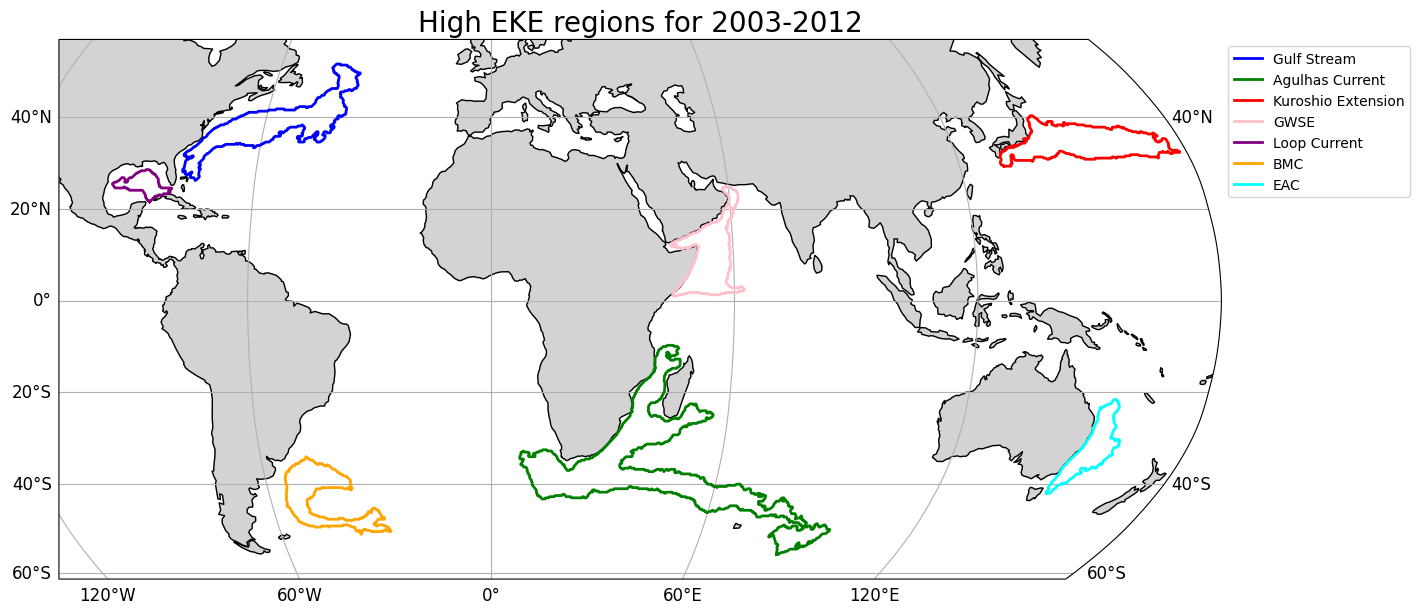

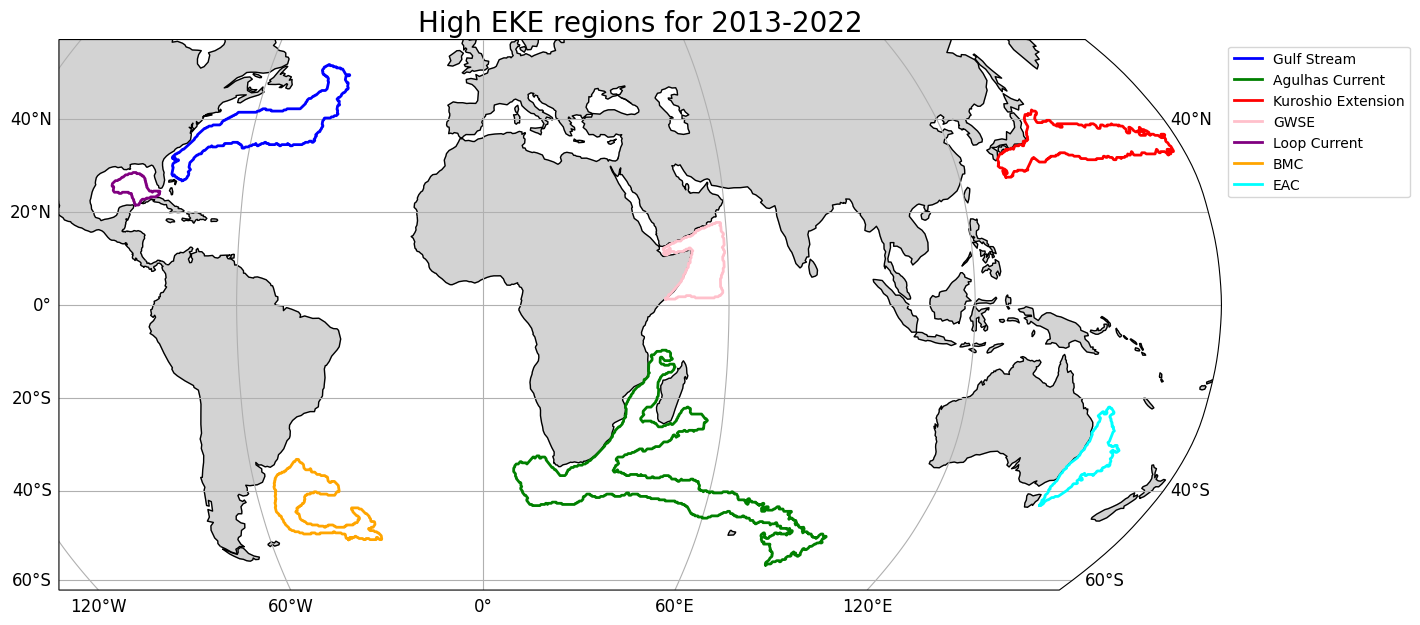

In [14]:
plt.figure(figsize=(15, 8))  

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

# Add land and coastline features
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.COASTLINE)

# Improve grid label visibility
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

# Define current colors
colors = {'Gulf Stream': 'blue', 'Agulhas Current': 'green', 'Kuroshio Extension': 'red', 
          "GWSE": 'pink', "Loop Current": 'purple', "BMC": 'orange', "EAC": 'cyan'}

# Plot each current's coordinates
for current_name, coords in currents_coords.items():
    if coords is not None:
        ax.plot(coords[:, 0], coords[:, 1], label=current_name, 
                color=colors.get(current_name, 'black'), linewidth=2, transform=ccrs.PlateCarree())


plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


#do the same for the decades
plt.figure(figsize=(15, 8))  

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

# Add land and coastline features
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.COASTLINE)

# Improve grid label visibility
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

# Define current colors
colors = {'Gulf Stream': 'blue', 'Agulhas Current': 'green', 'Kuroshio Extension': 'red', 
          "GWSE": 'pink', "Loop Current": 'purple', "BMC": 'orange', "EAC": 'cyan'}

# Plot each current's coordinates
for current_name, coords in currents_coords_1.items():
    if coords is not None:
        ax.plot(coords[:, 0], coords[:, 1], label=current_name, 
                color=colors.get(current_name, 'black'), linewidth=2, transform=ccrs.PlateCarree())
        
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('High EKE regions for 1993-2002', fontsize=20)
plt.show()


plt.figure(figsize=(15, 8))  

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

# Add land and coastline features
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.COASTLINE)

# Improve grid label visibility
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

# Plot each current's coordinates
for current_name, coords in currents_coords_2.items():
    if coords is not None:
        ax.plot(coords[:, 0], coords[:, 1], label=current_name, 
                color=colors.get(current_name, 'black'), linewidth=2, transform=ccrs.PlateCarree())
        
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('High EKE regions for 2003-2012', fontsize=20)
plt.show()



plt.figure(figsize=(15, 8))  

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

# Add land and coastline features
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.COASTLINE)

# Improve grid label visibility
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

# Plot each current's coordinates
for current_name, coords in currents_coords_3.items():
    if coords is not None:
        ax.plot(coords[:, 0], coords[:, 1], label=current_name, 
                color=colors.get(current_name, 'black'), linewidth=2, transform=ccrs.PlateCarree())
        
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('High EKE regions for 2013-2022', fontsize=20)
plt.show()

# Cálculo %

In [15]:
mean_EKE_final = mean_EKE_final.T
mean_TKE_final = mean_TKE_final.T
MKE_final = MKE_final.T

#decades
mean_EKE_1 = mean_EKE_1.T
mean_TKE_1 = mean_TKE_1.T
MKE_1 = MKE_1.T

mean_EKE_2 = mean_EKE_2.T
mean_TKE_2 = mean_TKE_2.T
MKE_2 = MKE_2.T

mean_EKE_3 = mean_EKE_3.T
mean_TKE_3 = mean_TKE_3.T
MKE_3 = MKE_3.T

gulf_stream_coords = currents_coords["Gulf Stream"]
Agulhas_Current_coords = currents_coords["Agulhas Current"]
Kuroshio_Extension_coords = currents_coords["Kuroshio Extension"]
GWSE_coords = currents_coords["GWSE"]
Loop_Current_coords = currents_coords["Loop Current"]
BMC_coords = currents_coords["BMC"]
EAC_coords = currents_coords["EAC"]

# Create a Path object for the Gulf Stream contour
gulf_stream_path = Path(gulf_stream_coords)
Agulhas_Current_path = Path(Agulhas_Current_coords)
Kuroshio_Extension_path = Path(Kuroshio_Extension_coords)
GWSE_path = Path(GWSE_coords)
Loop_Current_path = Path(Loop_Current_coords) 
BMC_path = Path(BMC_coords)
EAC_path = Path(EAC_coords)

# Flatten the grids and stack them as (lon, lat) pairs
points = np.vstack((longitude.flatten(), latitude.flatten())).T

# Create a mask for points inside the Gulf Stream contour
mask_gulf = gulf_stream_path.contains_points(points).reshape(latitude.shape)
mask_agulhas = Agulhas_Current_path.contains_points(points).reshape(latitude.shape)
mask_kuroshio = Kuroshio_Extension_path.contains_points(points).reshape(latitude.shape)
mask_GWSE = GWSE_path.contains_points(points).reshape(latitude.shape)
mask_loop = Loop_Current_path.contains_points(points).reshape(latitude.shape)
mask_BMC = BMC_path.contains_points(points).reshape(latitude.shape)
mask_EAC = EAC_path.contains_points(points).reshape(latitude.shape)


# Apply the mask to the kinetic energy array
mean_EKE_gulf_stream = np.where(mask_gulf, mean_EKE_final, np.nan)
mean_TKE_gulf_stream = np.where(mask_gulf, mean_TKE_final, np.nan)
MKE_gulf_stream = np.where(mask_gulf, MKE_final, np.nan)

mean_EKE_agulhas = np.where(mask_agulhas, mean_EKE_final, np.nan)
mean_TKE_agulhas = np.where(mask_agulhas, mean_TKE_final, np.nan)
MKE_agulhas = np.where(mask_agulhas, MKE_final, np.nan)

mean_EKE_kuroshio = np.where(mask_kuroshio, mean_EKE_final, np.nan)
mean_TKE_kuroshio = np.where(mask_kuroshio, mean_TKE_final, np.nan)
MKE_kuroshio = np.where(mask_kuroshio, MKE_final, np.nan)

mean_EKE_GWSE = np.where(mask_GWSE, mean_EKE_final, np.nan)
mean_TKE_GWSE = np.where(mask_GWSE, mean_TKE_final, np.nan)
MKE_GWSE = np.where(mask_GWSE, MKE_final, np.nan)

mean_EKE_loop = np.where(mask_loop, mean_EKE_final, np.nan)
mean_TKE_loop = np.where(mask_loop, mean_TKE_final, np.nan)
MKE_loop = np.where(mask_loop, MKE_final, np.nan)

mean_EKE_BMC = np.where(mask_BMC, mean_EKE_final, np.nan)
mean_TKE_BMC = np.where(mask_BMC, mean_TKE_final, np.nan)
MKE_BMC = np.where(mask_BMC, MKE_final, np.nan)

mean_EKE_EAC = np.where(mask_EAC, mean_EKE_final, np.nan)
mean_TKE_EAC = np.where(mask_EAC, mean_TKE_final, np.nan)
MKE_EAC = np.where(mask_EAC, MKE_final, np.nan)



#decades
gulf_stream_coords_1 = currents_coords_1["Gulf Stream"]
Agulhas_Current_coords_1 = currents_coords_1["Agulhas Current"]
Kuroshio_Extension_coords_1 = currents_coords_1["Kuroshio Extension"]
GWSE_coords_1 = currents_coords_1["GWSE"]
Loop_Current_coords_1 = currents_coords_1["Loop Current"]
BMC_coords_1 = currents_coords_1["BMC"]
EAC_coords_1 = currents_coords_1["EAC"]

gulf_stream_coords_2 = currents_coords_2["Gulf Stream"]
Agulhas_Current_coords_2 = currents_coords_2["Agulhas Current"]
Kuroshio_Extension_coords_2 = currents_coords_2["Kuroshio Extension"]
GWSE_coords_2 = currents_coords_2["GWSE"]
Loop_Current_coords_2 = currents_coords_2["Loop Current"]
BMC_coords_2 = currents_coords_2["BMC"]
EAC_coords_2 = currents_coords_2["EAC"]

gulf_stream_coords_3 = currents_coords_3["Gulf Stream"]
Agulhas_Current_coords_3 = currents_coords_3["Agulhas Current"]
Kuroshio_Extension_coords_3 = currents_coords_3["Kuroshio Extension"]
GWSE_coords_3 = currents_coords_3["GWSE"]
Loop_Current_coords_3 = currents_coords_3["Loop Current"]
BMC_coords_3 = currents_coords_3["BMC"]
EAC_coords_3 = currents_coords_3["EAC"]

# Create a Path object for the Gulf Stream contour
gulf_stream_path_1 = Path(gulf_stream_coords_1)
Agulhas_Current_path_1 = Path(Agulhas_Current_coords_1)
Kuroshio_Extension_path_1 = Path(Kuroshio_Extension_coords_1)
GWSE_path_1 = Path(GWSE_coords_1)
Loop_Current_path_1 = Path(Loop_Current_coords_1)
BMC_path_1 = Path(BMC_coords_1)
EAC_path_1 = Path(EAC_coords_1)

gulf_stream_path_2 = Path(gulf_stream_coords_2)
Agulhas_Current_path_2 = Path(Agulhas_Current_coords_2)
Kuroshio_Extension_path_2 = Path(Kuroshio_Extension_coords_2)
GWSE_path_2 = Path(GWSE_coords_2)
Loop_Current_path_2 = Path(Loop_Current_coords_2)
BMC_path_2 = Path(BMC_coords_2)
EAC_path_2 = Path(EAC_coords_2)

gulf_stream_path_3 = Path(gulf_stream_coords_3)
Agulhas_Current_path_3 = Path(Agulhas_Current_coords_3)
Kuroshio_Extension_path_3 = Path(Kuroshio_Extension_coords_3)
GWSE_path_3 = Path(GWSE_coords_3)
Loop_Current_path_3 = Path(Loop_Current_coords_3)
BMC_path_3 = Path(BMC_coords_3)
EAC_path_3 = Path(EAC_coords_3)


#Create a mask for points inside the Gulf Stream contour
mask_gulf_1 = gulf_stream_path_1.contains_points(points).reshape(latitude.shape)
mask_agulhas_1 = Agulhas_Current_path_1.contains_points(points).reshape(latitude.shape)
mask_kuroshio_1 = Kuroshio_Extension_path_1.contains_points(points).reshape(latitude.shape)
mask_GWSE_1 = GWSE_path_1.contains_points(points).reshape(latitude.shape)
mask_loop_1 = Loop_Current_path_1.contains_points(points).reshape(latitude.shape)
mask_BMC_1 = BMC_path_1.contains_points(points).reshape(latitude.shape)
mask_EAC_1 = EAC_path_1.contains_points(points).reshape(latitude.shape)

mask_gulf_2 = gulf_stream_path_2.contains_points(points).reshape(latitude.shape)
mask_agulhas_2 = Agulhas_Current_path_2.contains_points(points).reshape(latitude.shape)
mask_kuroshio_2 = Kuroshio_Extension_path_2.contains_points(points).reshape(latitude.shape)
mask_GWSE_2 = GWSE_path_2.contains_points(points).reshape(latitude.shape)
mask_loop_2 = Loop_Current_path_2.contains_points(points).reshape(latitude.shape)
mask_BMC_2 = BMC_path_2.contains_points(points).reshape(latitude.shape)
mask_EAC_2 = EAC_path_2.contains_points(points).reshape(latitude.shape)

mask_gulf_3 = gulf_stream_path_3.contains_points(points).reshape(latitude.shape)
mask_agulhas_3 = Agulhas_Current_path_3.contains_points(points).reshape(latitude.shape)
mask_kuroshio_3 = Kuroshio_Extension_path_3.contains_points(points).reshape(latitude.shape)
mask_GWSE_3 = GWSE_path_3.contains_points(points).reshape(latitude.shape)
mask_loop_3 = Loop_Current_path_3.contains_points(points).reshape(latitude.shape)
mask_BMC_3 = BMC_path_3.contains_points(points).reshape(latitude.shape)
mask_EAC_3 = EAC_path_3.contains_points(points).reshape(latitude.shape)


# Apply the mask to the kinetic energy array
mean_EKE_gulf_stream_1 = np.where(mask_gulf_1, mean_EKE_1, np.nan)
mean_TKE_gulf_stream_1 = np.where(mask_gulf_1, mean_TKE_1, np.nan)
MKE_gulf_stream_1 = np.where(mask_gulf_1, MKE_1, np.nan)

mean_EKE_agulhas_1 = np.where(mask_agulhas_1, mean_EKE_1, np.nan)
mean_TKE_agulhas_1 = np.where(mask_agulhas_1, mean_TKE_1, np.nan)
MKE_agulhas_1 = np.where(mask_agulhas_1, MKE_1, np.nan)

mean_EKE_kuroshio_1 = np.where(mask_kuroshio_1, mean_EKE_1, np.nan)
mean_TKE_kuroshio_1 = np.where(mask_kuroshio_1, mean_TKE_1, np.nan)
MKE_kuroshio_1 = np.where(mask_kuroshio_1, MKE_1, np.nan)

mean_EKE_GWSE_1 = np.where(mask_GWSE_1, mean_EKE_1, np.nan)
mean_TKE_GWSE_1 = np.where(mask_GWSE_1, mean_TKE_1, np.nan)
MKE_GWSE_1 = np.where(mask_GWSE_1, MKE_1, np.nan)

mean_EKE_loop_1 = np.where(mask_loop_1, mean_EKE_1, np.nan)
mean_TKE_loop_1 = np.where(mask_loop_1, mean_TKE_1, np.nan)
MKE_loop_1 = np.where(mask_loop_1, MKE_1, np.nan)

mean_EKE_BMC_1 = np.where(mask_BMC_1, mean_EKE_1, np.nan)
mean_TKE_BMC_1 = np.where(mask_BMC_1, mean_TKE_1, np.nan)
MKE_BMC_1 = np.where(mask_BMC_1, MKE_1, np.nan)

mean_EKE_EAC_1 = np.where(mask_EAC_1, mean_EKE_1, np.nan)
mean_TKE_EAC_1 = np.where(mask_EAC_1, mean_TKE_1, np.nan)
MKE_EAC_1 = np.where(mask_EAC_1, MKE_1, np.nan)


mean_EKE_gulf_stream_2 = np.where(mask_gulf_2, mean_EKE_2, np.nan)
mean_TKE_gulf_stream_2 = np.where(mask_gulf_2, mean_TKE_2, np.nan)
MKE_gulf_stream_2 = np.where(mask_gulf_2, MKE_2, np.nan)

mean_EKE_agulhas_2 = np.where(mask_agulhas_2, mean_EKE_2, np.nan)
mean_TKE_agulhas_2 = np.where(mask_agulhas_2, mean_TKE_2, np.nan)
MKE_agulhas_2 = np.where(mask_agulhas_2, MKE_2, np.nan)

mean_EKE_kuroshio_2 = np.where(mask_kuroshio_2, mean_EKE_2, np.nan)
mean_TKE_kuroshio_2 = np.where(mask_kuroshio_2, mean_TKE_2, np.nan)
MKE_kuroshio_2 = np.where(mask_kuroshio_2, MKE_2, np.nan)

mean_EKE_GWSE_2 = np.where(mask_GWSE_2, mean_EKE_2, np.nan)
mean_TKE_GWSE_2 = np.where(mask_GWSE_2, mean_TKE_2, np.nan)
MKE_GWSE_2 = np.where(mask_GWSE_2, MKE_2, np.nan)

mean_EKE_loop_2 = np.where(mask_loop_2, mean_EKE_2, np.nan)
mean_TKE_loop_2 = np.where(mask_loop_2, mean_TKE_2, np.nan)
MKE_loop_2 = np.where(mask_loop_2, MKE_2, np.nan)

mean_EKE_BMC_2 = np.where(mask_BMC_2, mean_EKE_2, np.nan)
mean_TKE_BMC_2 = np.where(mask_BMC_2, mean_TKE_2, np.nan)
MKE_BMC_2 = np.where(mask_BMC_2, MKE_2, np.nan)

mean_EKE_EAC_2 = np.where(mask_EAC_2, mean_EKE_2, np.nan)
mean_TKE_EAC_2 = np.where(mask_EAC_2, mean_TKE_2, np.nan)
MKE_EAC_2 = np.where(mask_EAC_2, MKE_2, np.nan)


mean_EKE_gulf_stream_3 = np.where(mask_gulf_3, mean_EKE_3, np.nan)
mean_TKE_gulf_stream_3 = np.where(mask_gulf_3, mean_TKE_3, np.nan)
MKE_gulf_stream_3 = np.where(mask_gulf_3, MKE_3, np.nan)

mean_EKE_agulhas_3 = np.where(mask_agulhas_3, mean_EKE_3, np.nan)
mean_TKE_agulhas_3 = np.where(mask_agulhas_3, mean_TKE_3, np.nan)
MKE_agulhas_3 = np.where(mask_agulhas_3, MKE_3, np.nan)

mean_EKE_kuroshio_3 = np.where(mask_kuroshio_3, mean_EKE_3, np.nan)
mean_TKE_kuroshio_3 = np.where(mask_kuroshio_3, mean_TKE_3, np.nan)
MKE_kuroshio_3 = np.where(mask_kuroshio_3, MKE_3, np.nan)

mean_EKE_GWSE_3 = np.where(mask_GWSE_3, mean_EKE_3, np.nan)
mean_TKE_GWSE_3 = np.where(mask_GWSE_3, mean_TKE_3, np.nan)
MKE_GWSE_3 = np.where(mask_GWSE_3, MKE_3, np.nan)

mean_EKE_loop_3 = np.where(mask_loop_3, mean_EKE_3, np.nan)
mean_TKE_loop_3 = np.where(mask_loop_3, mean_TKE_3, np.nan)
MKE_loop_3 = np.where(mask_loop_3, MKE_3, np.nan)

mean_EKE_BMC_3 = np.where(mask_BMC_3, mean_EKE_3, np.nan)
mean_TKE_BMC_3 = np.where(mask_BMC_3, mean_TKE_3, np.nan)
MKE_BMC_3 = np.where(mask_BMC_3, MKE_3, np.nan)

mean_EKE_EAC_3 = np.where(mask_EAC_3, mean_EKE_3, np.nan)
mean_TKE_EAC_3 = np.where(mask_EAC_3, mean_TKE_3, np.nan)
MKE_EAC_3 = np.where(mask_EAC_3, MKE_3, np.nan)

### all other regions

In [16]:
#create a region mask for +- 5 degrees around the equator

mask_equator = np.zeros(mean_EKE_final.shape)
mask_equator[(latitude >= -5) & (latitude <= 5)] = 1
mask_equator

# Apply the mask to the kinetic energy array
mean_EKE_equator = np.where(mask_equator, mean_EKE_final, np.nan)
mean_TKE_equator = np.where(mask_equator, mean_TKE_final, np.nan)
MKE_equator = np.where(mask_equator, MKE_final, np.nan)


#decades
mask_equator_1 = np.zeros(mean_EKE_1.shape)
mask_equator_1[(latitude >= -5) & (latitude <= 5)] = 1
mask_equator_2 = np.zeros(mean_EKE_2.shape)
mask_equator_2[(latitude >= -5) & (latitude <= 5)] = 1
mask_equator_3 = np.zeros(mean_EKE_3.shape)
mask_equator_3[(latitude >= -5) & (latitude <= 5)] = 1

# Apply the mask to the kinetic energy array
mean_EKE_equator_1 = np.where(mask_equator_1, mean_EKE_1, np.nan)
mean_TKE_equator_1 = np.where(mask_equator_1, mean_TKE_1, np.nan)
MKE_equator_1 = np.where(mask_equator_1, MKE_1, np.nan)

mean_EKE_equator_2 = np.where(mask_equator_2, mean_EKE_2, np.nan)
mean_TKE_equator_2 = np.where(mask_equator_2, mean_TKE_2, np.nan)
MKE_equator_2 = np.where(mask_equator_2, MKE_2, np.nan)

mean_EKE_equator_3 = np.where(mask_equator_3, mean_EKE_3, np.nan)
mean_TKE_equator_3 = np.where(mask_equator_3, mean_TKE_3, np.nan)
MKE_equator_3 = np.where(mask_equator_3, MKE_3, np.nan)

In [17]:
mask_all_regions = mask_gulf + mask_agulhas + mask_kuroshio + mask_GWSE + mask_loop + mask_BMC + mask_EAC + mask_equator
mask_all_regions_01 = np.zeros(mask_all_regions.shape)
mask_all_regions_01[mask_all_regions==False] = 1
mask_all_regions_01[mask_all_regions==True] = 0

mask_rest_regions = mask_all_regions_01


# Apply the mask to the kinetic energy array
mean_EKE_rest_regions = np.where(mask_rest_regions, mean_EKE_final, np.nan)
mean_TKE_rest_regions = np.where(mask_rest_regions, mean_TKE_final, np.nan)
MKE_rest_regions = np.where(mask_rest_regions, MKE_final, np.nan)


#decades
mask_all_regions_1 = mask_gulf_1 + mask_agulhas_1 + mask_kuroshio_1 + mask_GWSE_1 + mask_loop_1 + mask_BMC_1 + mask_EAC_1 + mask_equator_1
mask_all_regions_01_1 = np.zeros(mask_all_regions_1.shape)
mask_all_regions_01_1[mask_all_regions_1==False] = 1
mask_all_regions_01_1[mask_all_regions_1==True] = 0

mask_rest_regions_1 = mask_all_regions_01_1


mask_all_regions_2 = mask_gulf_2 + mask_agulhas_2 + mask_kuroshio_2 + mask_GWSE_2 + mask_loop_2 + mask_BMC_2 + mask_EAC_2 + mask_equator_2
mask_all_regions_01_2 = np.zeros(mask_all_regions_2.shape)
mask_all_regions_01_2[mask_all_regions_2==False] = 1
mask_all_regions_01_2[mask_all_regions_2==True] = 0

mask_rest_regions_2 = mask_all_regions_01_2


mask_all_regions_3 = mask_gulf_3 + mask_agulhas_3 + mask_kuroshio_3 + mask_GWSE_3 + mask_loop_3 + mask_BMC_3 + mask_EAC_3 + mask_equator_3
mask_all_regions_01_3 = np.zeros(mask_all_regions_3.shape)
mask_all_regions_01_3[mask_all_regions_3==False] = 1
mask_all_regions_01_3[mask_all_regions_3==True] = 0

mask_rest_regions_3 = mask_all_regions_01_3

# Apply the mask to the kinetic energy array
mean_EKE_rest_regions_1 = np.where(mask_rest_regions_1, mean_EKE_1, np.nan)
mean_TKE_rest_regions_1 = np.where(mask_rest_regions_1, mean_TKE_1, np.nan)
MKE_rest_regions_1 = np.where(mask_rest_regions_1, MKE_1, np.nan)

mean_EKE_rest_regions_2 = np.where(mask_rest_regions_2, mean_EKE_2, np.nan)
mean_TKE_rest_regions_2 = np.where(mask_rest_regions_2, mean_TKE_2, np.nan)
MKE_rest_regions_2 = np.where(mask_rest_regions_2, MKE_2, np.nan)

mean_EKE_rest_regions_3 = np.where(mask_rest_regions_3, mean_EKE_3, np.nan)
mean_TKE_rest_regions_3 = np.where(mask_rest_regions_3, mean_TKE_3, np.nan)
MKE_rest_regions_3 = np.where(mask_rest_regions_3, MKE_3, np.nan)

C:\Users\mrpal\AppData\Local\Temp\ipykernel_10908\445887386.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
C:\Users\mrpal\AppData\Local\Temp\ipykernel_10908\445887386.py:53: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


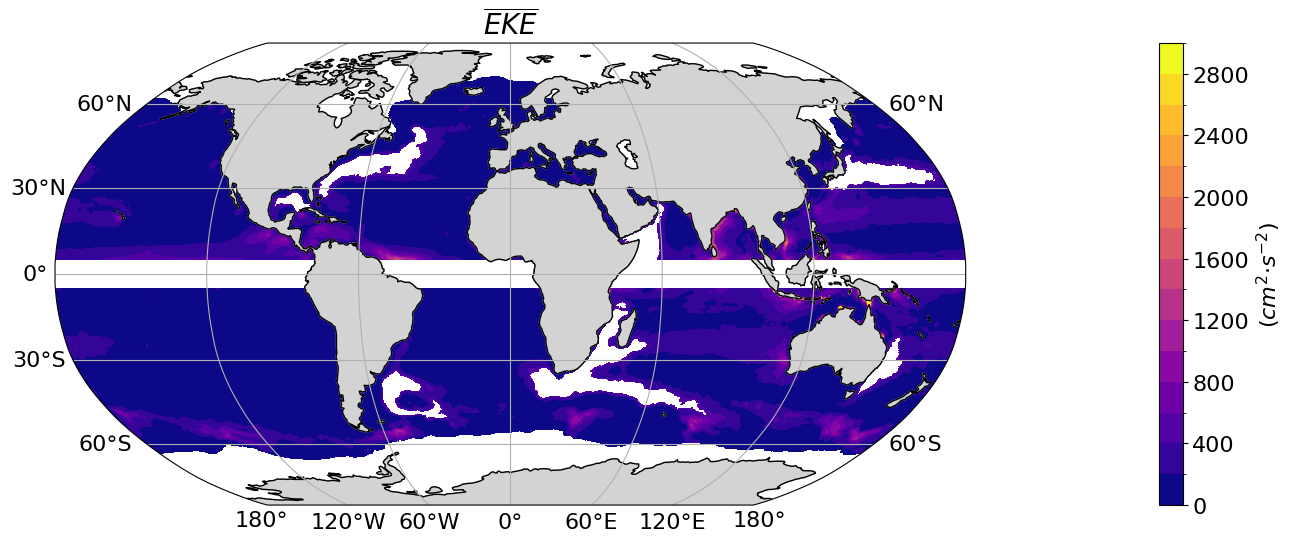

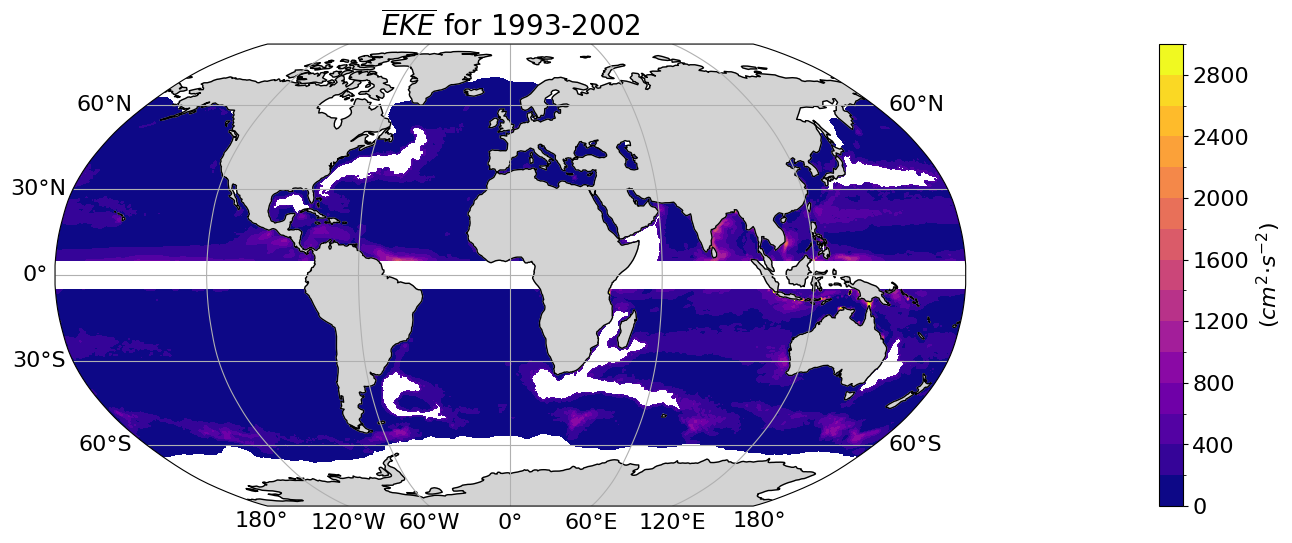

C:\Users\mrpal\AppData\Local\Temp\ipykernel_10908\445887386.py:80: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


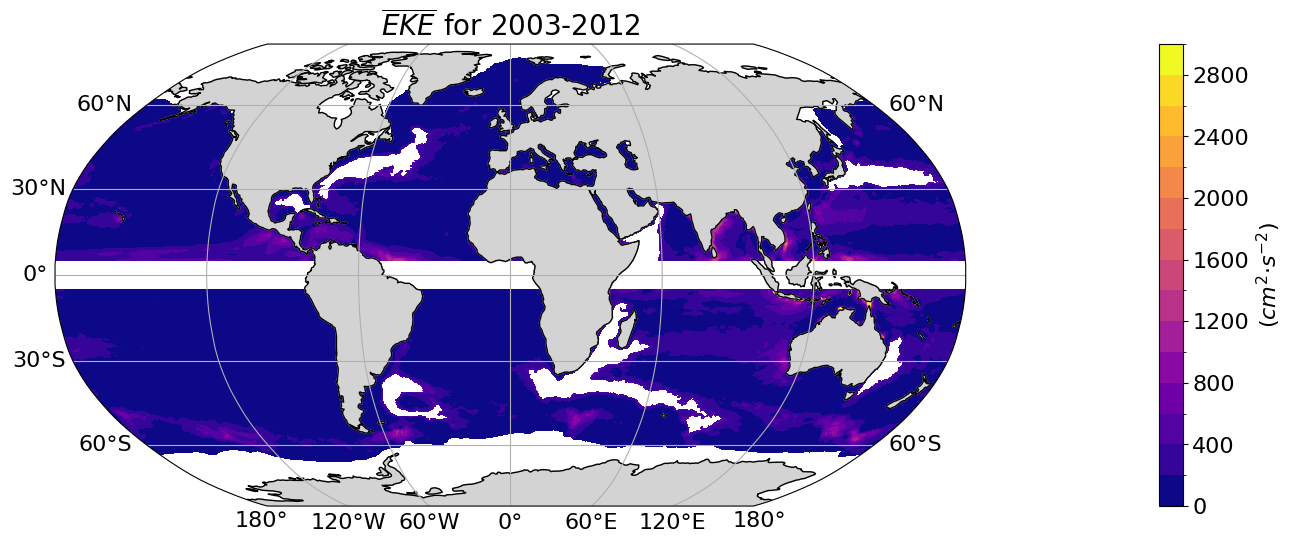

C:\Users\mrpal\AppData\Local\Temp\ipykernel_10908\445887386.py:107: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


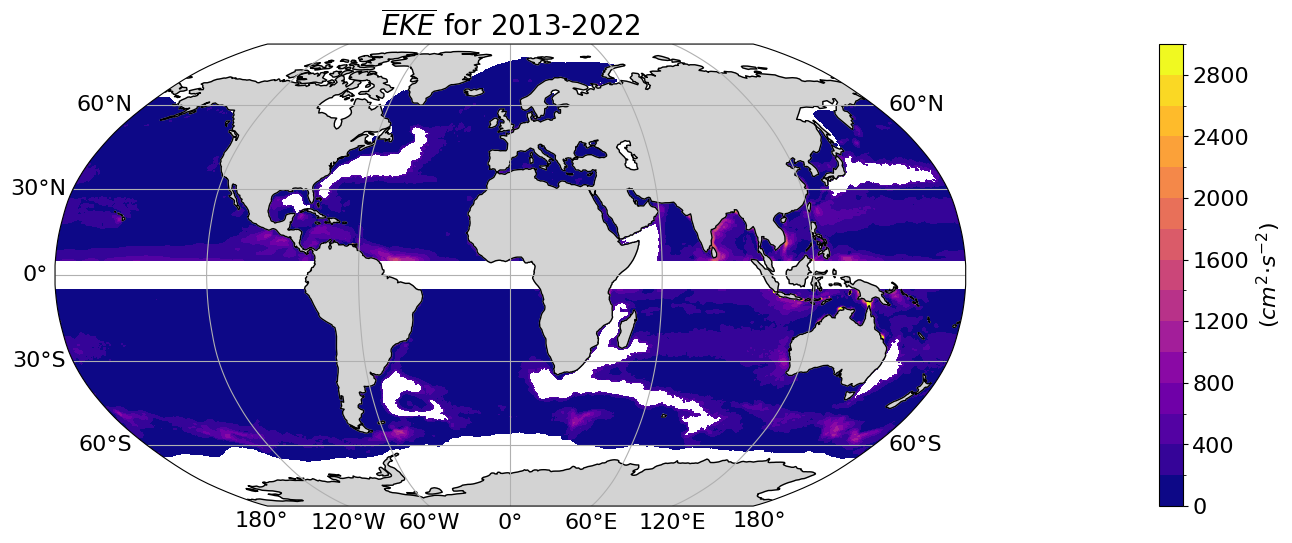

In [18]:
plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, mean_EKE_rest_regions , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{EKE}$', fontsize=20)




#decades

plt.figure(figsize=(50, 6))

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}

contour_plot = ax.contourf(longitude, latitude, mean_EKE_rest_regions_1 , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())

cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{EKE}$ for 1993-2002', fontsize=20)

plt.show()


plt.figure(figsize=(50, 6))

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}

contour_plot = ax.contourf(longitude, latitude, mean_EKE_rest_regions_2 , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())

cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{EKE}$ for 2003-2012', fontsize=20)

plt.show()


plt.figure(figsize=(50, 6))

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}

contour_plot = ax.contourf(longitude, latitude, mean_EKE_rest_regions_3 , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())

cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{EKE}$ for 2013-2022', fontsize=20)

plt.show()



## Mean

In [19]:
#Gulf Stream
MKE_gulf_stream_MEAN = np.nanmean(MKE_gulf_stream)
mean_TKE_gulf_stream_MEAN = np.nanmean(mean_TKE_gulf_stream)
mean_EKE_gulf_stream_MEAN = np.nanmean(mean_EKE_gulf_stream)

Ratio_MKE_TKE_gulf_stream = MKE_gulf_stream_MEAN/mean_TKE_gulf_stream_MEAN *100
Ratio_EKE_TKE_gulf_stream = mean_EKE_gulf_stream_MEAN/mean_TKE_gulf_stream_MEAN *100

print('Gulf Stream: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_gulf_stream)
print('Gulf Stream: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_gulf_stream)


#Agulhas Current
MKE_agulhas_MEAN = np.nanmean(MKE_agulhas)
mean_TKE_agulhas_MEAN = np.nanmean(mean_TKE_agulhas)
mean_EKE_agulhas_MEAN = np.nanmean(mean_EKE_agulhas)

Ratio_MKE_TKE_agulhas = MKE_agulhas_MEAN/mean_TKE_agulhas_MEAN *100
Ratio_EKE_TKE_agulhas = mean_EKE_agulhas_MEAN/mean_TKE_agulhas_MEAN *100

print('Agulhas Current: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_agulhas)
print('Agulhas Current: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_agulhas)

#Kuroshio Extension
MKE_kuroshio_MEAN = np.nanmean(MKE_kuroshio)
mean_TKE_kuroshio_MEAN = np.nanmean(mean_TKE_kuroshio)
mean_EKE_kuroshio_MEAN = np.nanmean(mean_EKE_kuroshio)

Ratio_MKE_TKE_kuroshio = MKE_kuroshio_MEAN/mean_TKE_kuroshio_MEAN *100
Ratio_EKE_TKE_kuroshio = mean_EKE_kuroshio_MEAN/mean_TKE_kuroshio_MEAN *100

print('Kuroshio Extension: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_kuroshio)
print('Kuroshio Extension: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_kuroshio)

#GWSE
MKE_GWSE_MEAN = np.nanmean(MKE_GWSE)
mean_TKE_GWSE_MEAN = np.nanmean(mean_TKE_GWSE)
mean_EKE_GWSE_MEAN = np.nanmean(mean_EKE_GWSE)

Ratio_MKE_TKE_GWSE = MKE_GWSE_MEAN/mean_TKE_GWSE_MEAN *100
Ratio_EKE_TKE_GWSE = mean_EKE_GWSE_MEAN/mean_TKE_GWSE_MEAN *100

print('GWSE: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_GWSE)
print('GWSE: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_GWSE)

#Loop Current
MKE_loop_MEAN = np.nanmean(MKE_loop)
mean_TKE_loop_MEAN = np.nanmean(mean_TKE_loop)
mean_EKE_loop_MEAN = np.nanmean(mean_EKE_loop)

Ratio_MKE_TKE_loop = MKE_loop_MEAN/mean_TKE_loop_MEAN *100
Ratio_EKE_TKE_loop = mean_EKE_loop_MEAN/mean_TKE_loop_MEAN *100

print('Loop Current: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_loop)
print('Loop Current: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_loop)

#BMC
MKE_BMC_MEAN = np.nanmean(MKE_BMC)
mean_TKE_BMC_MEAN = np.nanmean(mean_TKE_BMC)
mean_EKE_BMC_MEAN = np.nanmean(mean_EKE_BMC)

Ratio_MKE_TKE_BMC = MKE_BMC_MEAN/mean_TKE_BMC_MEAN *100
Ratio_EKE_TKE_BMC = mean_EKE_BMC_MEAN/mean_TKE_BMC_MEAN *100

print('BMC: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_BMC)
print('BMC: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_BMC)

#EAC
MKE_EAC_MEAN = np.nanmean(MKE_EAC)
mean_TKE_EAC_MEAN = np.nanmean(mean_TKE_EAC)
mean_EKE_EAC_MEAN = np.nanmean(mean_EKE_EAC)

Ratio_MKE_TKE_EAC = MKE_EAC_MEAN/mean_TKE_EAC_MEAN *100
Ratio_EKE_TKE_EAC = mean_EKE_EAC_MEAN/mean_TKE_EAC_MEAN *100

print('EAC: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_EAC)
print('EAC: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_EAC)


#Rest of the regions
MKE_rest_regions_MEAN = np.nanmean(MKE_rest_regions)
mean_TKE_rest_regions_MEAN = np.nanmean(mean_TKE_rest_regions)
mean_EKE_rest_regions_MEAN = np.nanmean(mean_EKE_rest_regions)

Ratio_MKE_TKE_rest_regions = MKE_rest_regions_MEAN/mean_TKE_rest_regions_MEAN *100
Ratio_EKE_TKE_rest_regions = mean_EKE_rest_regions_MEAN/mean_TKE_rest_regions_MEAN *100

print('Rest of the regions: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_rest_regions)
print('Rest of the regions: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_rest_regions)


#decades
#Gulf Stream
MKE_gulf_stream_MEAN_1 = np.nanmean(MKE_gulf_stream_1)
mean_TKE_gulf_stream_MEAN_1 = np.nanmean(mean_TKE_gulf_stream_1)
mean_EKE_gulf_stream_MEAN_1 = np.nanmean(mean_EKE_gulf_stream_1)

Ratio_MKE_TKE_gulf_stream_1 = MKE_gulf_stream_MEAN_1/mean_TKE_gulf_stream_MEAN_1 *100
Ratio_EKE_TKE_gulf_stream_1 = mean_EKE_gulf_stream_MEAN_1/mean_TKE_gulf_stream_MEAN_1 *100

print('Gulf Stream 1993-2002: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_gulf_stream_1)
print('Gulf Stream 1993-2002: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_gulf_stream_1)

#Agulhas Current
MKE_agulhas_MEAN_1 = np.nanmean(MKE_agulhas_1)
mean_TKE_agulhas_MEAN_1 = np.nanmean(mean_TKE_agulhas_1)
mean_EKE_agulhas_MEAN_1 = np.nanmean(mean_EKE_agulhas_1)

Ratio_MKE_TKE_agulhas_1 = MKE_agulhas_MEAN_1/mean_TKE_agulhas_MEAN_1 *100
Ratio_EKE_TKE_agulhas_1 = mean_EKE_agulhas_MEAN_1/mean_TKE_agulhas_MEAN_1 *100

print('Agulhas Current 1993-2002: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_agulhas_1)
print('Agulhas Current 1993-2002: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_agulhas_1)

#Kuroshio Extension
MKE_kuroshio_MEAN_1 = np.nanmean(MKE_kuroshio_1)
mean_TKE_kuroshio_MEAN_1 = np.nanmean(mean_TKE_kuroshio_1)
mean_EKE_kuroshio_MEAN_1 = np.nanmean(mean_EKE_kuroshio_1)

Ratio_MKE_TKE_kuroshio_1 = MKE_kuroshio_MEAN_1/mean_TKE_kuroshio_MEAN_1 *100
Ratio_EKE_TKE_kuroshio_1 = mean_EKE_kuroshio_MEAN_1/mean_TKE_kuroshio_MEAN_1 *100

print('Kuroshio Extension 1993-2002: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_kuroshio_1)
print('Kuroshio Extension 1993-2002: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_kuroshio_1)

#GWSE
MKE_GWSE_MEAN_1 = np.nanmean(MKE_GWSE_1)
mean_TKE_GWSE_MEAN_1 = np.nanmean(mean_TKE_GWSE_1)
mean_EKE_GWSE_MEAN_1 = np.nanmean(mean_EKE_GWSE_1)

Ratio_MKE_TKE_GWSE_1 = MKE_GWSE_MEAN_1/mean_TKE_GWSE_MEAN_1 *100
Ratio_EKE_TKE_GWSE_1 = mean_EKE_GWSE_MEAN_1/mean_TKE_GWSE_MEAN_1 *100

print('GWSE 1993-2002: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_GWSE_1)
print('GWSE 1993-2002: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_GWSE_1)

#Loop Current
MKE_loop_MEAN_1 = np.nanmean(MKE_loop_1)
mean_TKE_loop_MEAN_1 = np.nanmean(mean_TKE_loop_1)
mean_EKE_loop_MEAN_1 = np.nanmean(mean_EKE_loop_1)

Ratio_MKE_TKE_loop_1 = MKE_loop_MEAN_1/mean_TKE_loop_MEAN_1 *100
Ratio_EKE_TKE_loop_1 = mean_EKE_loop_MEAN_1/mean_TKE_loop_MEAN_1 *100

print('Loop Current 1993-2002: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_loop_1)
print('Loop Current 1993-2002: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_loop_1)

#BMC
MKE_BMC_MEAN_1 = np.nanmean(MKE_BMC_1)
mean_TKE_BMC_MEAN_1 = np.nanmean(mean_TKE_BMC_1)
mean_EKE_BMC_MEAN_1 = np.nanmean(mean_EKE_BMC_1)

Ratio_MKE_TKE_BMC_1 = MKE_BMC_MEAN_1/mean_TKE_BMC_MEAN_1 *100
Ratio_EKE_TKE_BMC_1 = mean_EKE_BMC_MEAN_1/mean_TKE_BMC_MEAN_1 *100

print('BMC 1993-2002: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_BMC_1)
print('BMC 1993-2002: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_BMC_1)

#EAC
MKE_EAC_MEAN_1 = np.nanmean(MKE_EAC_1)
mean_TKE_EAC_MEAN_1 = np.nanmean(mean_TKE_EAC_1)
mean_EKE_EAC_MEAN_1 = np.nanmean(mean_EKE_EAC_1)

Ratio_MKE_TKE_EAC_1 = MKE_EAC_MEAN_1/mean_TKE_EAC_MEAN_1 *100
Ratio_EKE_TKE_EAC_1 = mean_EKE_EAC_MEAN_1/mean_TKE_EAC_MEAN_1 *100

print('EAC 1993-2002: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_EAC_1)
print('EAC 1993-2002: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_EAC_1)

#Rest of the regions
MKE_rest_regions_MEAN_1 = np.nanmean(MKE_rest_regions_1)
mean_TKE_rest_regions_MEAN_1 = np.nanmean(mean_TKE_rest_regions_1)
mean_EKE_rest_regions_MEAN_1 = np.nanmean(mean_EKE_rest_regions_1)

Ratio_MKE_TKE_rest_regions_1 = MKE_rest_regions_MEAN_1/mean_TKE_rest_regions_MEAN_1 *100
Ratio_EKE_TKE_rest_regions_1 = mean_EKE_rest_regions_MEAN_1/mean_TKE_rest_regions_MEAN_1 *100

print('Rest of the regions 1993-2002: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_rest_regions_1)
print('Rest of the regions 1993-2002: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_rest_regions_1)



#Gulf Stream
MKE_gulf_stream_MEAN_2 = np.nanmean(MKE_gulf_stream_2)
mean_TKE_gulf_stream_MEAN_2 = np.nanmean(mean_TKE_gulf_stream_2)
mean_EKE_gulf_stream_MEAN_2 = np.nanmean(mean_EKE_gulf_stream_2)

Ratio_MKE_TKE_gulf_stream_2 = MKE_gulf_stream_MEAN_2/mean_TKE_gulf_stream_MEAN_2 *100
Ratio_EKE_TKE_gulf_stream_2 = mean_EKE_gulf_stream_MEAN_2/mean_TKE_gulf_stream_MEAN_2 *100

print('Gulf Stream 2003-2012: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_gulf_stream_2)
print('Gulf Stream 2003-2012: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_gulf_stream_2)

#Agulhas Current
MKE_agulhas_MEAN_2 = np.nanmean(MKE_agulhas_2)
mean_TKE_agulhas_MEAN_2 = np.nanmean(mean_TKE_agulhas_2)
mean_EKE_agulhas_MEAN_2 = np.nanmean(mean_EKE_agulhas_2)

Ratio_MKE_TKE_agulhas_2 = MKE_agulhas_MEAN_2/mean_TKE_agulhas_MEAN_2 *100
Ratio_EKE_TKE_agulhas_2 = mean_EKE_agulhas_MEAN_2/mean_TKE_agulhas_MEAN_2 *100

print('Agulhas Current 2003-2012: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_agulhas_2)
print('Agulhas Current 2003-2012: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_agulhas_2)

#Kuroshio Extension
MKE_kuroshio_MEAN_2 = np.nanmean(MKE_kuroshio_2)
mean_TKE_kuroshio_MEAN_2 = np.nanmean(mean_TKE_kuroshio_2)
mean_EKE_kuroshio_MEAN_2 = np.nanmean(mean_EKE_kuroshio_2)

Ratio_MKE_TKE_kuroshio_2 = MKE_kuroshio_MEAN_2/mean_TKE_kuroshio_MEAN_2 *100
Ratio_EKE_TKE_kuroshio_2 = mean_EKE_kuroshio_MEAN_2/mean_TKE_kuroshio_MEAN_2 *100

print('Kuroshio Extension 2003-2012: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_kuroshio_2)
print('Kuroshio Extension 2003-2012: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_kuroshio_2)

#GWSE
MKE_GWSE_MEAN_2 = np.nanmean(MKE_GWSE_2)
mean_TKE_GWSE_MEAN_2 = np.nanmean(mean_TKE_GWSE_2)
mean_EKE_GWSE_MEAN_2 = np.nanmean(mean_EKE_GWSE_2)

Ratio_MKE_TKE_GWSE_2 = MKE_GWSE_MEAN_2/mean_TKE_GWSE_MEAN_2 *100
Ratio_EKE_TKE_GWSE_2 = mean_EKE_GWSE_MEAN_2/mean_TKE_GWSE_MEAN_2 *100

print('GWSE 2003-2012: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_GWSE_2)
print('GWSE 2003-2012: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_GWSE_2)

#Loop Current
MKE_loop_MEAN_2 = np.nanmean(MKE_loop_2)
mean_TKE_loop_MEAN_2 = np.nanmean(mean_TKE_loop_2)
mean_EKE_loop_MEAN_2 = np.nanmean(mean_EKE_loop_2)

Ratio_MKE_TKE_loop_2 = MKE_loop_MEAN_2/mean_TKE_loop_MEAN_2 *100
Ratio_EKE_TKE_loop_2 = mean_EKE_loop_MEAN_2/mean_TKE_loop_MEAN_2 *100

print('Loop Current 2003-2012: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_loop_2)
print('Loop Current 2003-2012: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_loop_2)

#BMC
MKE_BMC_MEAN_2 = np.nanmean(MKE_BMC_2)
mean_TKE_BMC_MEAN_2 = np.nanmean(mean_TKE_BMC_2)
mean_EKE_BMC_MEAN_2 = np.nanmean(mean_EKE_BMC_2)

Ratio_MKE_TKE_BMC_2 = MKE_BMC_MEAN_2/mean_TKE_BMC_MEAN_2 *100
Ratio_EKE_TKE_BMC_2 = mean_EKE_BMC_MEAN_2/mean_TKE_BMC_MEAN_2 *100

print('BMC 2003-2012: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_BMC_2)
print('BMC 2003-2012: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_BMC_2)

#EAC
MKE_EAC_MEAN_2 = np.nanmean(MKE_EAC_2)
mean_TKE_EAC_MEAN_2 = np.nanmean(mean_TKE_EAC_2)
mean_EKE_EAC_MEAN_2 = np.nanmean(mean_EKE_EAC_2)

Ratio_MKE_TKE_EAC_2 = MKE_EAC_MEAN_2/mean_TKE_EAC_MEAN_2 *100
Ratio_EKE_TKE_EAC_2 = mean_EKE_EAC_MEAN_2/mean_TKE_EAC_MEAN_2 *100

print('EAC 2003-2012: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_EAC_2)
print('EAC 2003-2012: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_EAC_2)


#Rest of the regions
MKE_rest_regions_MEAN_2 = np.nanmean(MKE_rest_regions_2)
mean_TKE_rest_regions_MEAN_2 = np.nanmean(mean_TKE_rest_regions_2)
mean_EKE_rest_regions_MEAN_2 = np.nanmean(mean_EKE_rest_regions_2)

Ratio_MKE_TKE_rest_regions_2 = MKE_rest_regions_MEAN_2/mean_TKE_rest_regions_MEAN_2 *100
Ratio_EKE_TKE_rest_regions_2 = mean_EKE_rest_regions_MEAN_2/mean_TKE_rest_regions_MEAN_2 *100

print('Rest of the regions 2003-2012: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_rest_regions_2)
print('Rest of the regions 2003-2012: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_rest_regions_2)


#Gulf Stream
MKE_gulf_stream_MEAN_3 = np.nanmean(MKE_gulf_stream_3)
mean_TKE_gulf_stream_MEAN_3 = np.nanmean(mean_TKE_gulf_stream_3)
mean_EKE_gulf_stream_MEAN_3 = np.nanmean(mean_EKE_gulf_stream_3)

Ratio_MKE_TKE_gulf_stream_3 = MKE_gulf_stream_MEAN_3/mean_TKE_gulf_stream_MEAN_3 *100
Ratio_EKE_TKE_gulf_stream_3 = mean_EKE_gulf_stream_MEAN_3/mean_TKE_gulf_stream_MEAN_3 *100

print('Gulf Stream 2013-2022: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_gulf_stream_3)
print('Gulf Stream 2013-2022: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_gulf_stream_3)

#Agulhas Current
MKE_agulhas_MEAN_3 = np.nanmean(MKE_agulhas_3)
mean_TKE_agulhas_MEAN_3 = np.nanmean(mean_TKE_agulhas_3)
mean_EKE_agulhas_MEAN_3 = np.nanmean(mean_EKE_agulhas_3)

Ratio_MKE_TKE_agulhas_3 = MKE_agulhas_MEAN_3/mean_TKE_agulhas_MEAN_3 *100
Ratio_EKE_TKE_agulhas_3 = mean_EKE_agulhas_MEAN_3/mean_TKE_agulhas_MEAN_3 *100

print('Agulhas Current 2013-2022: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_agulhas_3)
print('Agulhas Current 2013-2022: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_agulhas_3)

#Kuroshio Extension
MKE_kuroshio_MEAN_3 = np.nanmean(MKE_kuroshio_3)
mean_TKE_kuroshio_MEAN_3 = np.nanmean(mean_TKE_kuroshio_3)
mean_EKE_kuroshio_MEAN_3 = np.nanmean(mean_EKE_kuroshio_3)

Ratio_MKE_TKE_kuroshio_3 = MKE_kuroshio_MEAN_3/mean_TKE_kuroshio_MEAN_3 *100
Ratio_EKE_TKE_kuroshio_3 = mean_EKE_kuroshio_MEAN_3/mean_TKE_kuroshio_MEAN_3 *100

print('Kuroshio Extension 2013-2022: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_kuroshio_3)
print('Kuroshio Extension 2013-2022: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_kuroshio_3)

#GWSE
MKE_GWSE_MEAN_3 = np.nanmean(MKE_GWSE_3)
mean_TKE_GWSE_MEAN_3 = np.nanmean(mean_TKE_GWSE_3)
mean_EKE_GWSE_MEAN_3 = np.nanmean(mean_EKE_GWSE_3)

Ratio_MKE_TKE_GWSE_3 = MKE_GWSE_MEAN_3/mean_TKE_GWSE_MEAN_3 *100
Ratio_EKE_TKE_GWSE_3 = mean_EKE_GWSE_MEAN_3/mean_TKE_GWSE_MEAN_3 *100

print('GWSE 2013-2022: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_GWSE_3)
print('GWSE 2013-2022: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_GWSE_3)

#Loop Current
MKE_loop_MEAN_3 = np.nanmean(MKE_loop_3)
mean_TKE_loop_MEAN_3 = np.nanmean(mean_TKE_loop_3)
mean_EKE_loop_MEAN_3 = np.nanmean(mean_EKE_loop_3)

Ratio_MKE_TKE_loop_3 = MKE_loop_MEAN_3/mean_TKE_loop_MEAN_3 *100
Ratio_EKE_TKE_loop_3 = mean_EKE_loop_MEAN_3/mean_TKE_loop_MEAN_3 *100

print('Loop Current 2013-2022: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_loop_3)
print('Loop Current 2013-2022: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_loop_3)

#BMC
MKE_BMC_MEAN_3 = np.nanmean(MKE_BMC_3)
mean_TKE_BMC_MEAN_3 = np.nanmean(mean_TKE_BMC_3)
mean_EKE_BMC_MEAN_3 = np.nanmean(mean_EKE_BMC_3)

Ratio_MKE_TKE_BMC_3 = MKE_BMC_MEAN_3/mean_TKE_BMC_MEAN_3 *100
Ratio_EKE_TKE_BMC_3 = mean_EKE_BMC_MEAN_3/mean_TKE_BMC_MEAN_3 *100

print('BMC 2013-2022: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_BMC_3)
print('BMC 2013-2022: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_BMC_3)

#EAC
MKE_EAC_MEAN_3 = np.nanmean(MKE_EAC_3)
mean_TKE_EAC_MEAN_3 = np.nanmean(mean_TKE_EAC_3)
mean_EKE_EAC_MEAN_3 = np.nanmean(mean_EKE_EAC_3)

Ratio_MKE_TKE_EAC_3 = MKE_EAC_MEAN_3/mean_TKE_EAC_MEAN_3 *100
Ratio_EKE_TKE_EAC_3 = mean_EKE_EAC_MEAN_3/mean_TKE_EAC_MEAN_3 *100

print('EAC 2013-2022: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_EAC_3)
print('EAC 2013-2022: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_EAC_3)


#Rest of the regions
MKE_rest_regions_MEAN_3 = np.nanmean(MKE_rest_regions_3)
mean_TKE_rest_regions_MEAN_3 = np.nanmean(mean_TKE_rest_regions_3)
mean_EKE_rest_regions_MEAN_3 = np.nanmean(mean_EKE_rest_regions_3)

Ratio_MKE_TKE_rest_regions_3 = MKE_rest_regions_MEAN_3/mean_TKE_rest_regions_MEAN_3 *100
Ratio_EKE_TKE_rest_regions_3 = mean_EKE_rest_regions_MEAN_3/mean_TKE_rest_regions_MEAN_3 *100

print('Rest of the regions 2013-2022: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_rest_regions_3)
print('Rest of the regions 2013-2022: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_rest_regions_3)

Gulf Stream: MKE mean / TKE mean *100 =  21.803612229350627
Gulf Stream: EKE mean / TKE mean *100 =  78.19638603688878
Agulhas Current: MKE mean / TKE mean *100 =  22.487864075544568
Agulhas Current: EKE mean / TKE mean *100 =  77.51213386582135
Kuroshio Extension: MKE mean / TKE mean *100 =  14.785023540597782
Kuroshio Extension: EKE mean / TKE mean *100 =  85.21497155367582
GWSE: MKE mean / TKE mean *100 =  8.445790302981178
GWSE: EKE mean / TKE mean *100 =  91.48439964388292
Loop Current: MKE mean / TKE mean *100 =  33.46834493015764
Loop Current: EKE mean / TKE mean *100 =  66.53165711407807
BMC: MKE mean / TKE mean *100 =  16.040702916724122
BMC: EKE mean / TKE mean *100 =  83.95929424902903
EAC: MKE mean / TKE mean *100 =  14.107826413393687
EAC: EKE mean / TKE mean *100 =  85.89217391234607
Rest of the regions: MKE mean / TKE mean *100 =  22.794559271744294
Rest of the regions: EKE mean / TKE mean *100 =  77.51442955972168
Gulf Stream 1993-2002: MKE mean / TKE mean *100 =  23.52

In [20]:
# Mean of all regions
#create a list of EKE, TKE and MKE  for all regions to later do the mean

mean_EKE_all = [mean_EKE_gulf_stream, mean_EKE_agulhas, mean_EKE_kuroshio, mean_EKE_GWSE, mean_EKE_loop, mean_EKE_BMC, mean_EKE_EAC]
mean_TKE_all = [mean_TKE_gulf_stream, mean_TKE_agulhas, mean_TKE_kuroshio, mean_TKE_GWSE, mean_TKE_loop, mean_TKE_BMC, mean_TKE_EAC]
MKE_all = [MKE_gulf_stream, MKE_agulhas, MKE_kuroshio, MKE_GWSE, MKE_loop, MKE_BMC, MKE_EAC]

# Convert lists to numpy arrays
mean_EKE_all = np.array(mean_EKE_all)
mean_TKE_all = np.array(mean_TKE_all)
MKE_all = np.array(MKE_all)

# Calculate the mean of all regions
mean_EKE_all_mean = np.nanmean(mean_EKE_all)
mean_TKE_all_mean = np.nanmean(mean_TKE_all)
MKE_all_mean = np.nanmean(MKE_all)

# Calculate the ratio of MKE and EKE to TKE
MKE_TKE_ratio_all = MKE_all_mean / mean_TKE_all_mean
EKE_TKE_ratio_all = mean_EKE_all_mean / mean_TKE_all_mean

print('MKE mean / TKE mean *100 = ', MKE_TKE_ratio_all * 100)
print('EKE mean / TKE mean *100 = ', EKE_TKE_ratio_all * 100)


# Mean of all regions for each decade
#create a list of EKE, TKE and MKE  for all regions to later do the mean

mean_EKE_all_1 = [mean_EKE_gulf_stream_1, mean_EKE_agulhas_1, mean_EKE_kuroshio_1, mean_EKE_GWSE_1, mean_EKE_loop_1, mean_EKE_BMC_1, mean_EKE_EAC_1]
mean_TKE_all_1 = [mean_TKE_gulf_stream_1, mean_TKE_agulhas_1, mean_TKE_kuroshio_1, mean_TKE_GWSE_1, mean_TKE_loop_1, mean_TKE_BMC_1, mean_TKE_EAC_1]
MKE_all_1 = [MKE_gulf_stream_1, MKE_agulhas_1, MKE_kuroshio_1, MKE_GWSE_1, MKE_loop_1, MKE_BMC_1, MKE_EAC_1]

mean_EKE_all_2 = [mean_EKE_gulf_stream_2, mean_EKE_agulhas_2, mean_EKE_kuroshio_2, mean_EKE_GWSE_2, mean_EKE_loop_2, mean_EKE_BMC_2, mean_EKE_EAC_2]
mean_TKE_all_2 = [mean_TKE_gulf_stream_2, mean_TKE_agulhas_2, mean_TKE_kuroshio_2, mean_TKE_GWSE_2, mean_TKE_loop_2, mean_TKE_BMC_2, mean_TKE_EAC_2]
MKE_all_2 = [MKE_gulf_stream_2, MKE_agulhas_2, MKE_kuroshio_2, MKE_GWSE_2, MKE_loop_2, MKE_BMC_2, MKE_EAC_2]

mean_EKE_all_3 = [mean_EKE_gulf_stream_3, mean_EKE_agulhas_3, mean_EKE_kuroshio_3, mean_EKE_GWSE_3, mean_EKE_loop_3, mean_EKE_BMC_3, mean_EKE_EAC_3]
mean_TKE_all_3 = [mean_TKE_gulf_stream_3, mean_TKE_agulhas_3, mean_TKE_kuroshio_3, mean_TKE_GWSE_3, mean_TKE_loop_3, mean_TKE_BMC_3, mean_TKE_EAC_3]
MKE_all_3 = [MKE_gulf_stream_3, MKE_agulhas_3, MKE_kuroshio_3, MKE_GWSE_3, MKE_loop_3, MKE_BMC_3, MKE_EAC_3]


# Convert lists to numpy arrays
mean_EKE_all_1 = np.array(mean_EKE_all_1)
mean_TKE_all_1 = np.array(mean_TKE_all_1)
MKE_all_1 = np.array(MKE_all_1)

mean_EKE_all_2 = np.array(mean_EKE_all_2)
mean_TKE_all_2 = np.array(mean_TKE_all_2)
MKE_all_2 = np.array(MKE_all_2)

mean_EKE_all_3 = np.array(mean_EKE_all_3)
mean_TKE_all_3 = np.array(mean_TKE_all_3)
MKE_all_3 = np.array(MKE_all_3)

# Calculate the mean of all regions
mean_EKE_all_mean_1 = np.nanmean(mean_EKE_all_1)
mean_TKE_all_mean_1 = np.nanmean(mean_TKE_all_1)
MKE_all_mean_1 = np.nanmean(MKE_all_1)

mean_EKE_all_mean_2 = np.nanmean(mean_EKE_all_2)
mean_TKE_all_mean_2 = np.nanmean(mean_TKE_all_2)
MKE_all_mean_2 = np.nanmean(MKE_all_2)

mean_EKE_all_mean_3 = np.nanmean(mean_EKE_all_3)
mean_TKE_all_mean_3 = np.nanmean(mean_TKE_all_3)
MKE_all_mean_3 = np.nanmean(MKE_all_3)


# Calculate the ratio of MKE and EKE to TKE
MKE_TKE_ratio_all_1 = MKE_all_mean_1 / mean_TKE_all_mean_1
EKE_TKE_ratio_all_1 = mean_EKE_all_mean_1 / mean_TKE_all_mean_1

MKE_TKE_ratio_all_2 = MKE_all_mean_2 / mean_TKE_all_mean_2
EKE_TKE_ratio_all_2 = mean_EKE_all_mean_2 / mean_TKE_all_mean_2

MKE_TKE_ratio_all_3 = MKE_all_mean_3 / mean_TKE_all_mean_3
EKE_TKE_ratio_all_3 = mean_EKE_all_mean_3 / mean_TKE_all_mean_3

print('MKE mean / TKE mean *100 1993-2002 = ', MKE_TKE_ratio_all_1 * 100)
print('EKE mean / TKE mean *100 1993-2002 = ', EKE_TKE_ratio_all_1 * 100)

print('MKE mean / TKE mean *100 2003-2012 = ', MKE_TKE_ratio_all_2 * 100)
print('EKE mean / TKE mean *100 2003-2012 = ', EKE_TKE_ratio_all_2 * 100)

print('MKE mean / TKE mean *100 2013-2022 = ', MKE_TKE_ratio_all_3 * 100)
print('EKE mean / TKE mean *100 2013-2022 = ', EKE_TKE_ratio_all_3 * 100)

MKE mean / TKE mean *100 =  19.14147957368436
EKE mean / TKE mean *100 =  80.85552914605381
MKE mean / TKE mean *100 1993-2002 =  19.485438580023377
EKE mean / TKE mean *100 1993-2002 =  80.51243283778646
MKE mean / TKE mean *100 2003-2012 =  19.744905298956574
EKE mean / TKE mean *100 2003-2012 =  80.2507444578647
MKE mean / TKE mean *100 2013-2022 =  19.478532299179196
EKE mean / TKE mean *100 2013-2022 =  80.51718750161795


globally

In [21]:
mean_EKE_MEAN = np.nanmean(mean_EKE_final)
mean_TKE_MEAN = np.nanmean(mean_TKE_final)
MKE_MEAN = np.nanmean(MKE_final)

Ratio_MKE_TKE = MKE_MEAN/mean_TKE_MEAN *100
Ratio_EKE_TKE = mean_EKE_MEAN/mean_TKE_MEAN *100

print('Globally: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE)
print('Globally: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE)

#deacdes

mean_EKE_MEAN_1 = np.nanmean(mean_EKE_1)
mean_TKE_MEAN_1 = np.nanmean(mean_TKE_1)
MKE_MEAN_1 = np.nanmean(MKE_1)

Ratio_MKE_TKE_1 = MKE_MEAN_1/mean_TKE_MEAN_1 *100
Ratio_EKE_TKE_1 = mean_EKE_MEAN_1/mean_TKE_MEAN_1 *100

print('Globally 1993-2002: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_1)
print('Globally 1993-2002: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_1)

mean_EKE_MEAN_2 = np.nanmean(mean_EKE_2)
mean_TKE_MEAN_2 = np.nanmean(mean_TKE_2)
MKE_MEAN_2 = np.nanmean(MKE_2)

Ratio_MKE_TKE_2 = MKE_MEAN_2/mean_TKE_MEAN_2 *100
Ratio_EKE_TKE_2 = mean_EKE_MEAN_2/mean_TKE_MEAN_2 *100

print('Globally 2003-2012: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_2)
print('Globally 2003-2012: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_2)

mean_EKE_MEAN_3 = np.nanmean(mean_EKE_3)
mean_TKE_MEAN_3 = np.nanmean(mean_TKE_3)
MKE_MEAN_3 = np.nanmean(MKE_3)

Ratio_MKE_TKE_3 = MKE_MEAN_3/mean_TKE_MEAN_3 *100
Ratio_EKE_TKE_3 = mean_EKE_MEAN_3/mean_TKE_MEAN_3 *100

print('Globally 2013-2022: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_3)
print('Globally 2013-2022: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_3)

Globally: MKE mean / TKE mean *100 =  24.58461301047021
Globally: EKE mean / TKE mean *100 =  75.6242100803102
Globally 1993-2002: MKE mean / TKE mean *100 =  25.00999166125174
Globally 1993-2002: EKE mean / TKE mean *100 =  75.0812999124854
Globally 2003-2012: MKE mean / TKE mean *100 =  25.376602445088785
Globally 2003-2012: EKE mean / TKE mean *100 =  74.73019220076937
Globally 2013-2022: MKE mean / TKE mean *100 =  25.638953805869356
Globally 2013-2022: EKE mean / TKE mean *100 =  74.69326891926647


In [22]:
mean_EKE_MEAN_regions = [mean_EKE_gulf_stream_MEAN, mean_EKE_agulhas_MEAN, mean_EKE_kuroshio_MEAN, mean_EKE_GWSE_MEAN, mean_EKE_loop_MEAN, mean_EKE_BMC_MEAN, mean_EKE_EAC_MEAN, mean_EKE_all_mean, mean_EKE_rest_regions_MEAN, mean_EKE_MEAN]
mean_TKE_MEAN_regions = [mean_TKE_gulf_stream_MEAN, mean_TKE_agulhas_MEAN, mean_TKE_kuroshio_MEAN, mean_TKE_GWSE_MEAN, mean_TKE_loop_MEAN, mean_TKE_BMC_MEAN, mean_TKE_EAC_MEAN, mean_TKE_all_mean, mean_TKE_rest_regions_MEAN, mean_TKE_MEAN]
MKE_MEAN_regions = [MKE_gulf_stream_MEAN, MKE_agulhas_MEAN, MKE_kuroshio_MEAN, MKE_GWSE_MEAN, MKE_loop_MEAN, MKE_BMC_MEAN, MKE_EAC_MEAN, MKE_all_mean, MKE_rest_regions_MEAN, MKE_MEAN]

mean_EKE_MEAN_regions_1 = [mean_EKE_gulf_stream_MEAN_1, mean_EKE_agulhas_MEAN_1, mean_EKE_kuroshio_MEAN_1, mean_EKE_GWSE_MEAN_1, mean_EKE_loop_MEAN_1, mean_EKE_BMC_MEAN_1, mean_EKE_EAC_MEAN_1, mean_EKE_all_mean_1, mean_EKE_rest_regions_MEAN_1, mean_EKE_MEAN_1]
mean_TKE_MEAN_regions_1 = [mean_TKE_gulf_stream_MEAN_1, mean_TKE_agulhas_MEAN_1, mean_TKE_kuroshio_MEAN_1, mean_TKE_GWSE_MEAN_1, mean_TKE_loop_MEAN_1, mean_TKE_BMC_MEAN_1, mean_TKE_EAC_MEAN_1, mean_TKE_all_mean_1, mean_TKE_rest_regions_MEAN_1, mean_TKE_MEAN_1]
MKE_MEAN_regions_1 = [MKE_gulf_stream_MEAN_1, MKE_agulhas_MEAN_1, MKE_kuroshio_MEAN_1, MKE_GWSE_MEAN_1, MKE_loop_MEAN_1, MKE_BMC_MEAN_1, MKE_EAC_MEAN_1, MKE_all_mean_1, MKE_rest_regions_MEAN_1, MKE_MEAN_1]

mean_EKE_MEAN_regions_2 = [mean_EKE_gulf_stream_MEAN_2, mean_EKE_agulhas_MEAN_2, mean_EKE_kuroshio_MEAN_2, mean_EKE_GWSE_MEAN_2, mean_EKE_loop_MEAN_2, mean_EKE_BMC_MEAN_2, mean_EKE_EAC_MEAN_2, mean_EKE_all_mean_2, mean_EKE_rest_regions_MEAN_2, mean_EKE_MEAN_2]
mean_TKE_MEAN_regions_2 = [mean_TKE_gulf_stream_MEAN_2, mean_TKE_agulhas_MEAN_2, mean_TKE_kuroshio_MEAN_2, mean_TKE_GWSE_MEAN_2, mean_TKE_loop_MEAN_2, mean_TKE_BMC_MEAN_2, mean_TKE_EAC_MEAN_2, mean_TKE_all_mean_2, mean_TKE_rest_regions_MEAN_2, mean_TKE_MEAN_2]
MKE_MEAN_regions_2 = [MKE_gulf_stream_MEAN_2, MKE_agulhas_MEAN_2, MKE_kuroshio_MEAN_2, MKE_GWSE_MEAN_2, MKE_loop_MEAN_2, MKE_BMC_MEAN_2, MKE_EAC_MEAN_2, MKE_all_mean_2, MKE_rest_regions_MEAN_2, MKE_MEAN_2]

mean_EKE_MEAN_regions_3 = [mean_EKE_gulf_stream_MEAN_3, mean_EKE_agulhas_MEAN_3, mean_EKE_kuroshio_MEAN_3, mean_EKE_GWSE_MEAN_3, mean_EKE_loop_MEAN_3, mean_EKE_BMC_MEAN_3, mean_EKE_EAC_MEAN_3, mean_EKE_all_mean_3, mean_EKE_rest_regions_MEAN_3, mean_EKE_MEAN_3]
mean_TKE_MEAN_regions_3 = [mean_TKE_gulf_stream_MEAN_3, mean_TKE_agulhas_MEAN_3, mean_TKE_kuroshio_MEAN_3, mean_TKE_GWSE_MEAN_3, mean_TKE_loop_MEAN_3, mean_TKE_BMC_MEAN_3, mean_TKE_EAC_MEAN_3, mean_TKE_all_mean_3, mean_TKE_rest_regions_MEAN_3, mean_TKE_MEAN_3]
MKE_MEAN_regions_3 = [MKE_gulf_stream_MEAN_3, MKE_agulhas_MEAN_3, MKE_kuroshio_MEAN_3, MKE_GWSE_MEAN_3, MKE_loop_MEAN_3, MKE_BMC_MEAN_3, MKE_EAC_MEAN_3, MKE_all_mean_3, MKE_rest_regions_MEAN_3, MKE_MEAN_3]


# Convert lists to numpy arrays
mean_EKE_MEAN_regions = np.array(mean_EKE_MEAN_regions)
mean_TKE_MEAN_regions = np.array(mean_TKE_MEAN_regions)
MKE_MEAN_regions = np.array(MKE_MEAN_regions)

mean_EKE_MEAN_regions_1 = np.array(mean_EKE_MEAN_regions_1)
mean_TKE_MEAN_regions_1 = np.array(mean_TKE_MEAN_regions_1)
MKE_MEAN_regions_1 = np.array(MKE_MEAN_regions_1)

mean_EKE_MEAN_regions_2 = np.array(mean_EKE_MEAN_regions_2)
mean_TKE_MEAN_regions_2 = np.array(mean_TKE_MEAN_regions_2)
MKE_MEAN_regions_2 = np.array(MKE_MEAN_regions_2)

mean_EKE_MEAN_regions_3 = np.array(mean_EKE_MEAN_regions_3)
mean_TKE_MEAN_regions_3 = np.array(mean_TKE_MEAN_regions_3)
MKE_MEAN_regions_3 = np.array(MKE_MEAN_regions_3)


print('mean EKE regions 1993-2022 = ', mean_EKE_MEAN_regions )
print('mean EKE regions 1993-2002 = ', mean_EKE_MEAN_regions_1 )
print('mean EKE regions 2003-2012 = ', mean_EKE_MEAN_regions_2 )
print('mean EKE regions 2013-2022 = ', mean_EKE_MEAN_regions_3)


mean EKE regions 1993-2022 =  [1077.58359144  979.34603644 1041.08307488 1153.79119185 1131.81468459
  831.43802739  925.11181207 1009.0593853   145.58311355  213.04486612]
mean EKE regions 1993-2002 =  [1059.26129793  986.4835172  1021.05589072 1143.33072516 1099.56530288
  785.70633465  916.96364221  998.59359246  141.62087392  206.06108187]
mean EKE regions 2003-2012 =  [1055.4810002   932.99730674 1047.11414204 1144.36127545 1151.92771728
  835.61794302  909.52446862  985.47478189  138.50319479  204.98135901]
mean EKE regions 2013-2022 =  [1087.96772323  952.49786727 1034.18469672 1220.97231884 1227.66443252
  861.95321635  927.76421655 1006.85037682  142.04577012  210.9484223 ]


In [23]:
# Calculate the ratio of MKE and EKE to TKE
MKE_TKE_ratio_regions = MKE_MEAN_regions / mean_TKE_MEAN_regions * 100
EKE_TKE_ratio_regions = mean_EKE_MEAN_regions / mean_TKE_MEAN_regions * 100

MKE_TKE_ratio_regions_1 = MKE_MEAN_regions_1 / mean_TKE_MEAN_regions_1 * 100
EKE_TKE_ratio_regions_1 = mean_EKE_MEAN_regions_1 / mean_TKE_MEAN_regions_1 * 100

MKE_TKE_ratio_regions_2 = MKE_MEAN_regions_2 / mean_TKE_MEAN_regions_2 * 100
EKE_TKE_ratio_regions_2 = mean_EKE_MEAN_regions_2 / mean_TKE_MEAN_regions_2 * 100

MKE_TKE_ratio_regions_3 = MKE_MEAN_regions_3 / mean_TKE_MEAN_regions_3 * 100
EKE_TKE_ratio_regions_3 = mean_EKE_MEAN_regions_3 / mean_TKE_MEAN_regions_3 * 100


print('MKE mean / TKE mean *100 = ', MKE_TKE_ratio_regions)
print('EKE mean / TKE mean *100 = ', EKE_TKE_ratio_regions)

print('MKE mean / TKE mean *100 1993-2002 = ', MKE_TKE_ratio_regions_1)
print('EKE mean / TKE mean *100 1993-2002 = ', EKE_TKE_ratio_regions_1)

print('MKE mean / TKE mean *100 2003-2012 = ', MKE_TKE_ratio_regions_2)
print('EKE mean / TKE mean *100 2003-2012 = ', EKE_TKE_ratio_regions_2)

print('MKE mean / TKE mean *100 2013-2022 = ', MKE_TKE_ratio_regions_3)
print('EKE mean / TKE mean *100 2013-2022 = ', EKE_TKE_ratio_regions_3)

MKE mean / TKE mean *100 =  [21.80361223 22.48786408 14.78502354  8.4457903  33.46834493 16.04070292
 14.10782641 19.14147957 22.79455927 24.58461301]
EKE mean / TKE mean *100 =  [78.19638604 77.51213387 85.21497155 91.48439964 66.53165711 83.95929425
 85.89217391 80.85552915 77.51442956 75.62421008]
MKE mean / TKE mean *100 1993-2002 =  [23.52598956 20.84563402 17.19439843 10.01036795 34.3299141  17.28299917
 12.23562702 19.48543858 23.87089394 25.00999166]
EKE mean / TKE mean *100 1993-2002 =  [76.47400547 79.15436245 82.80559405 89.94632997 65.62089656 82.7170045
 87.76437216 80.51243284 76.28243212 75.08129991]
MKE mean / TKE mean *100 2003-2012 =  [21.89340087 22.64814027 18.03195331  7.94223319 34.28186599 15.97560684
 14.67142182 19.7449053  23.38485531 25.37660245]
EKE mean / TKE mean *100 2003-2012 =  [78.10659899 77.35185299 81.96804133 91.98913231 65.66234899 84.02439334
 85.32856856 80.25074446 76.79978106 74.7301922 ]
MKE mean / TKE mean *100 2013-2022 =  [22.50774089 21.7

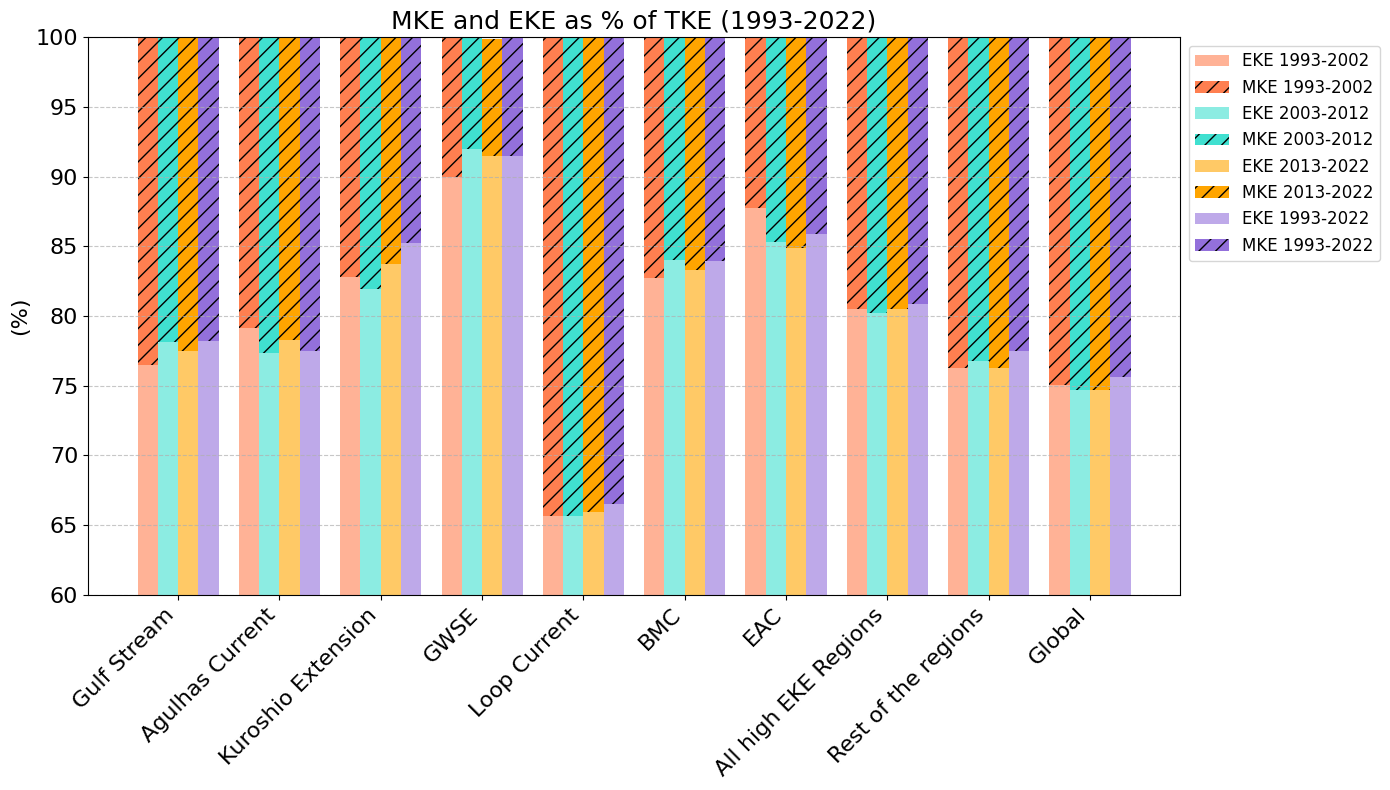

In [24]:
regions = ["Gulf Stream", "Agulhas Current", "Kuroshio Extension", "GWSE", "Loop Current","BMC", "EAC","All high EKE Regions" ,"Rest of the regions", "Global"]

# Define bar width and positions
width = 0.2 
x = np.arange(len(regions))

# Create the figure
fig, ax1 = plt.subplots(figsize=(14, 8))

periods = [
    ("1993-2002", MKE_TKE_ratio_regions_1, EKE_TKE_ratio_regions_1, "coral"),
    ("2003-2012", MKE_TKE_ratio_regions_2, EKE_TKE_ratio_regions_2, "turquoise"),
    ("2013-2022", MKE_TKE_ratio_regions_3, EKE_TKE_ratio_regions_3, "orange"),
    ("1993-2022", MKE_TKE_ratio_regions, EKE_TKE_ratio_regions, "mediumpurple")
]

# Plot each time period with stacked bars
for i, (label, MKE_ratio, EKE_ratio, color) in enumerate(periods):
    bottom = np.zeros(len(regions))  # Reset bottom for stacking
    ax1.bar(x + i * width, EKE_ratio, width, label=f"EKE {label}", bottom=bottom, color=color, alpha=0.6)
    bottom += EKE_ratio  # Update bottom
    ax1.bar(x + i * width, MKE_ratio, width, label=f"MKE {label}", bottom=bottom, color=color, alpha=1.0, hatch='//')

# Customize plot
ax1.set_xticks(x + 1.5 * width)
ax1.set_xticklabels(regions, rotation=45, ha="right", fontsize=16)
ax1.set_title("MKE and EKE as % of TKE (1993-2022)", fontsize=18)
ax1.set_ylabel("(%)", fontsize=16)
ax1.legend(loc="upper left", fontsize=12)
ax1.grid(axis="y", linestyle="--", alpha=0.7)


'''
# Create secondary y-axis for absolute energy values
ax2 = ax1.twinx()

absolute_values = [
    ("1993-2002", mean_EKE_MEAN_regions_1, mean_TKE_MEAN_regions_1, MKE_MEAN_regions_1, "o", "blue"),
    ("2003-2012", mean_EKE_MEAN_regions_2, mean_TKE_MEAN_regions_2, MKE_MEAN_regions_2, "s", "green"),
    ("2013-2022", mean_EKE_MEAN_regions_3, mean_TKE_MEAN_regions_3, MKE_MEAN_regions_3, "D", "red"),
    ("1993-2022", mean_EKE_MEAN_regions, mean_TKE_MEAN_regions, MKE_MEAN_regions, "P", "purple")
]

for i, (label, mean_EKE, mean_TKE, mean_MKE, marker, color) in enumerate(absolute_values):
    offset = (i - 1.5) * width  # Offset for proper alignment
    ax2.scatter(x + offset, mean_EKE, color=color, label=f'Mean EKE {label}', marker=marker, s=80)
    ax2.scatter(x + offset, mean_TKE, color=color, label=f'Mean TKE {label}', marker=marker, s=80, edgecolors='black')
    ax2.scatter(x + offset, mean_MKE, color=color, label=f'Mean MKE {label}', marker=marker, s=80, alpha=0.7)

ax2.set_ylabel(r'Absolute Energy $(cm^2·s^{-2})$', fontsize=14)
ax2.legend(loc="upper right", fontsize=12)
'''
ax1.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=12)

plt.yticks(fontsize=16)
plt.ylim(60,100)

plt.tight_layout()
plt.show()

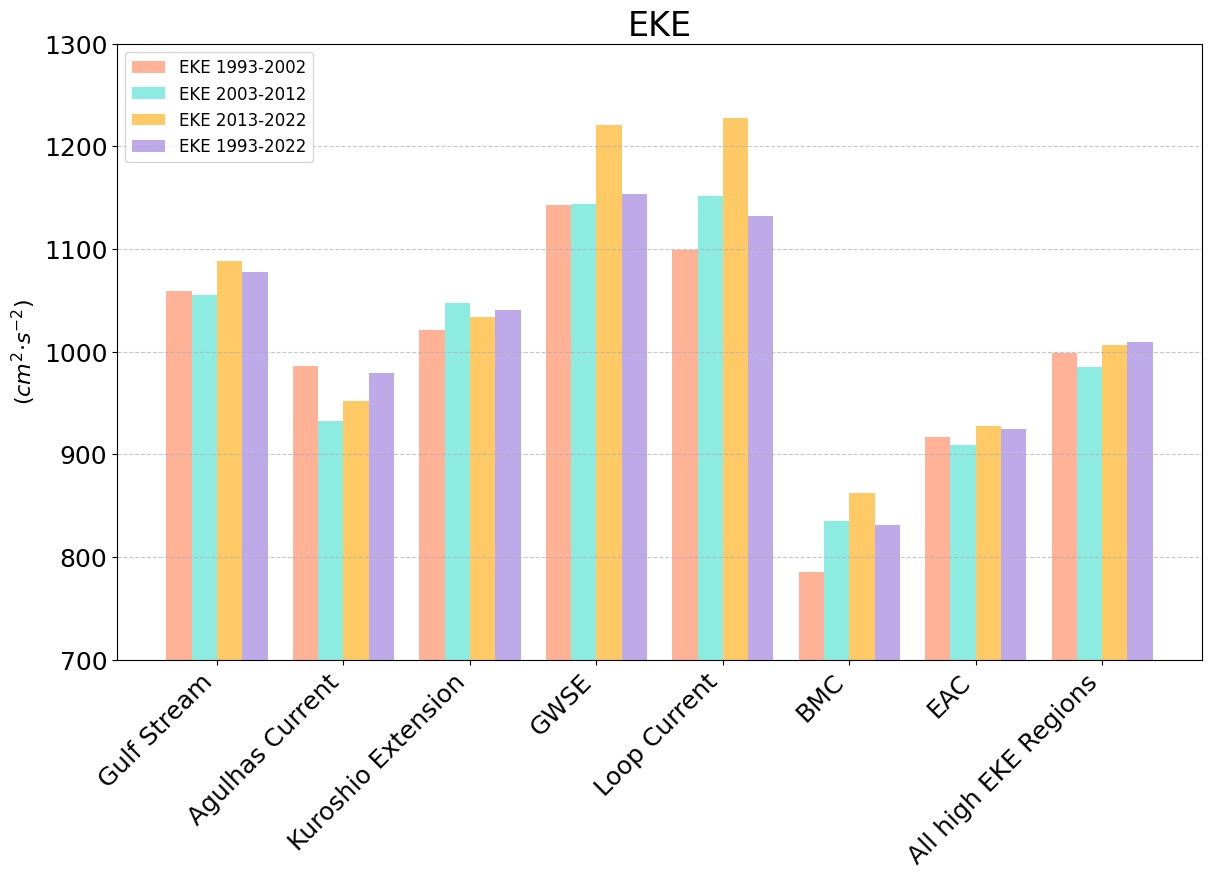

In [41]:
regions = ["Gulf Stream", "Agulhas Current", "Kuroshio Extension", "GWSE", "Loop Current","BMC", "EAC","All high EKE Regions"]#"Rest of the regions", "Global"]

# Define bar width and positions
width = 0.2 
x = np.arange(len(regions))

fig, ax1 = plt.subplots(figsize=(14, 8))

periods = [
    ("1993-2002", mean_EKE_MEAN_regions_1[:-2], "coral"),
    ("2003-2012",mean_EKE_MEAN_regions_2[:-2] , "turquoise"),
    ("2013-2022", mean_EKE_MEAN_regions_3[:-2], "orange"),
    ("1993-2022", mean_EKE_MEAN_regions[:-2], "mediumpurple")
]


for i, (label, mean_EKE, color) in enumerate(periods):
    bottom = np.zeros(len(regions))  # Reset bottom for stacking
    ax1.bar(x + i * width, mean_EKE, width, label=f"EKE {label}", bottom=bottom, color=color, alpha=0.6)
   # bottom += EKE_ratio  
    


ax1.set_xticks(x + 1.5 * width)
ax1.set_xticklabels(regions, rotation=45, ha="right", fontsize=16)
ax1.set_title("EKE", fontsize=24)
ax1.set_ylabel(r'$(cm^2·s^{-2})$', fontsize=16)
ax1.legend(loc="upper left", fontsize=12)
ax1.grid(axis="y", linestyle="--", alpha=0.7)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.ylim(700,1300)
plt.show()

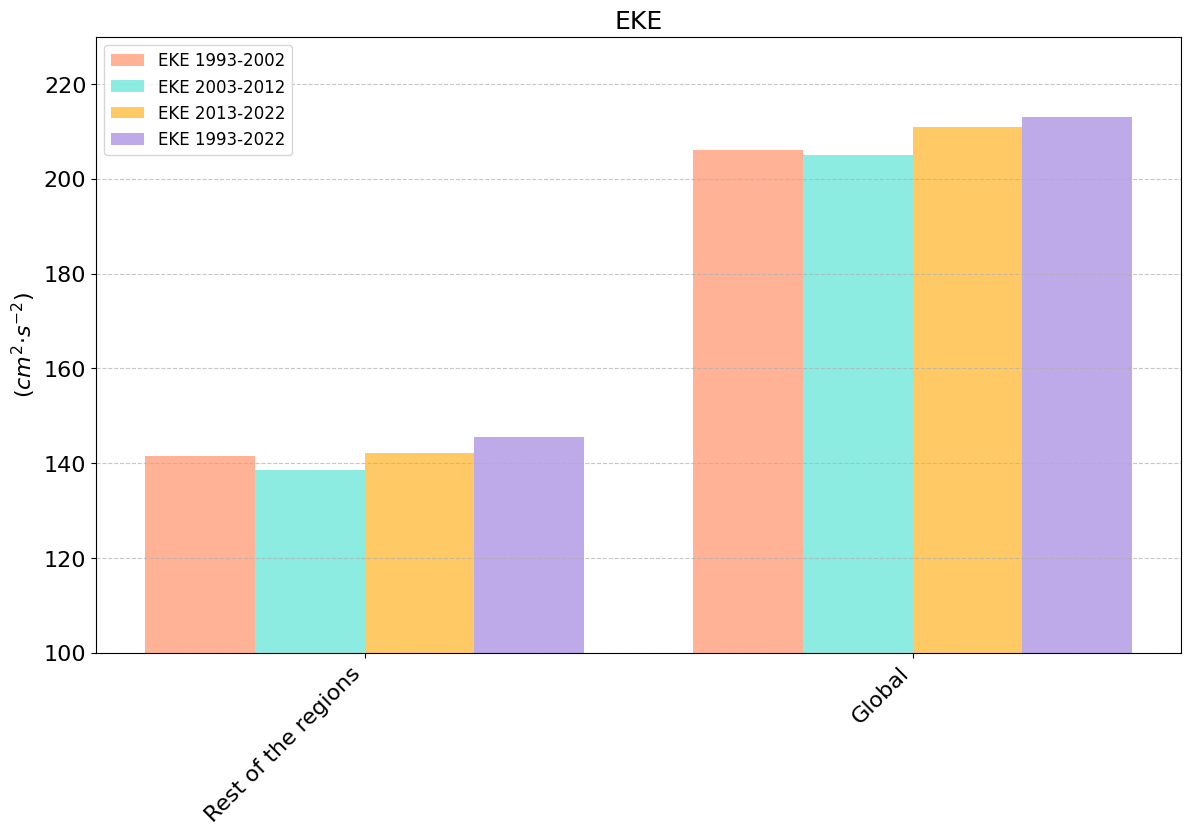

In [26]:
regions = ["Rest of the regions", "Global"]

# Define bar width and positions
width = 0.2 
x = np.arange(len(regions))

fig, ax1 = plt.subplots(figsize=(14, 8))

periods = [
    ("1993-2002", mean_EKE_MEAN_regions_1[-2:], "coral"),
    ("2003-2012",mean_EKE_MEAN_regions_2[-2:] , "turquoise"),
    ("2013-2022", mean_EKE_MEAN_regions_3[-2:], "orange"),
    ("1993-2022", mean_EKE_MEAN_regions[-2:], "mediumpurple")
]


for i, (label, mean_EKE, color) in enumerate(periods):
    bottom = np.zeros(len(regions))  # Reset bottom for stacking
    ax1.bar(x + i * width, mean_EKE, width, label=f"EKE {label}", bottom=bottom, color=color, alpha=0.6)
   # bottom += EKE_ratio  
    


ax1.set_xticks(x + 1.5 * width)
ax1.set_xticklabels(regions, rotation=45, ha="right", fontsize=16)
ax1.set_title("EKE", fontsize=18)
ax1.set_ylabel(r'$(cm^2·s^{-2})$', fontsize=16)
ax1.legend(loc="upper left", fontsize=12)
ax1.grid(axis="y", linestyle="--", alpha=0.7)

plt.yticks(fontsize=16)
plt.ylim(100,230)
plt.show()


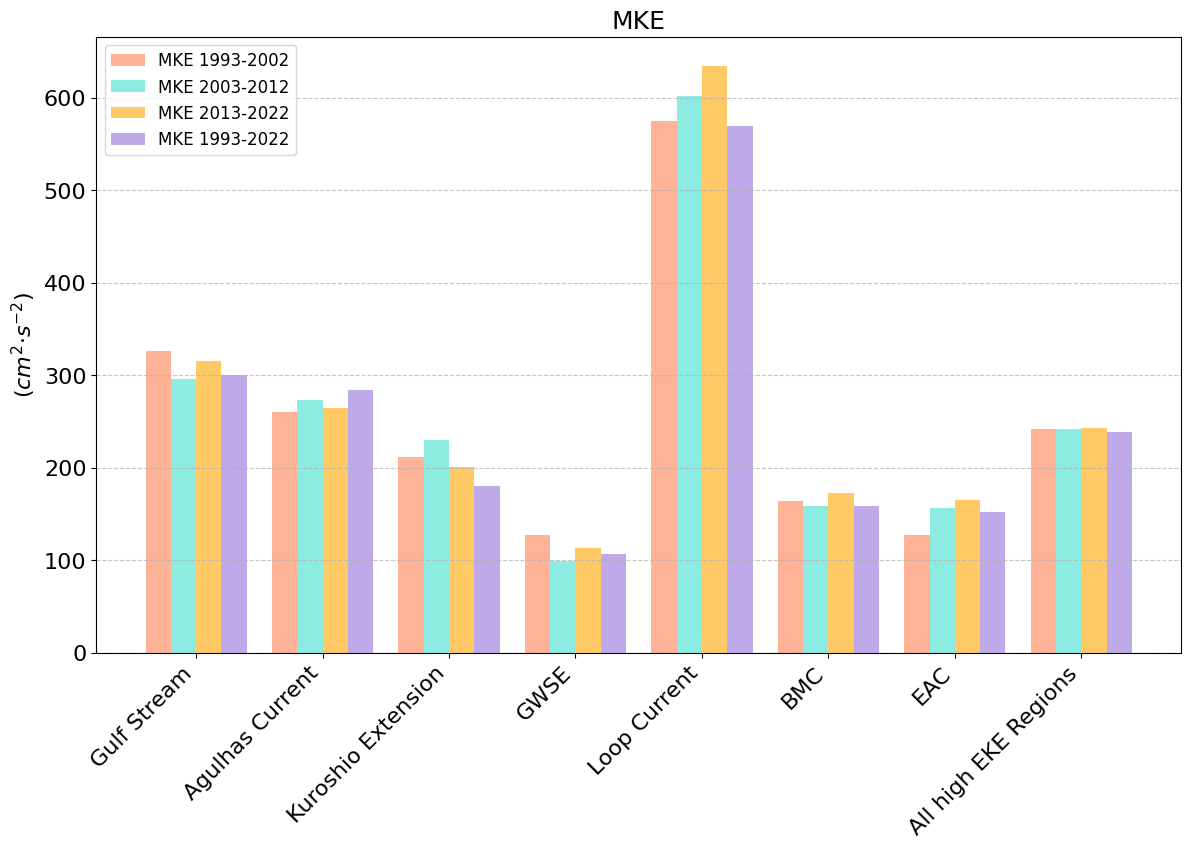

In [27]:
regions = ["Gulf Stream", "Agulhas Current", "Kuroshio Extension", "GWSE", "Loop Current","BMC", "EAC","All high EKE Regions"]#"Rest of the regions", "Global"]

# Define bar width and positions
width = 0.2 
x = np.arange(len(regions))

fig, ax1 = plt.subplots(figsize=(14, 8))

periods = [
    ("1993-2002", MKE_MEAN_regions_1[:-2], "coral"),
    ("2003-2012", MKE_MEAN_regions_2[:-2] , "turquoise"),
    ("2013-2022", MKE_MEAN_regions_3[:-2], "orange"),
    ("1993-2022", MKE_MEAN_regions[:-2], "mediumpurple")
]


for i, (label, MKE, color) in enumerate(periods):
    bottom = np.zeros(len(regions))  # Reset bottom for stacking
    ax1.bar(x + i * width, MKE, width, label=f"MKE {label}", bottom=bottom, color=color, alpha=0.6)
   # bottom += EKE_ratio  
    


ax1.set_xticks(x + 1.5 * width)
ax1.set_xticklabels(regions, rotation=45, ha="right", fontsize=16)
ax1.set_title("MKE", fontsize=18)
ax1.set_ylabel(r'$(cm^2·s^{-2})$', fontsize=16)
ax1.legend(loc="upper left", fontsize=12)
ax1.grid(axis="y", linestyle="--", alpha=0.7)

plt.yticks(fontsize=16)
plt.show()

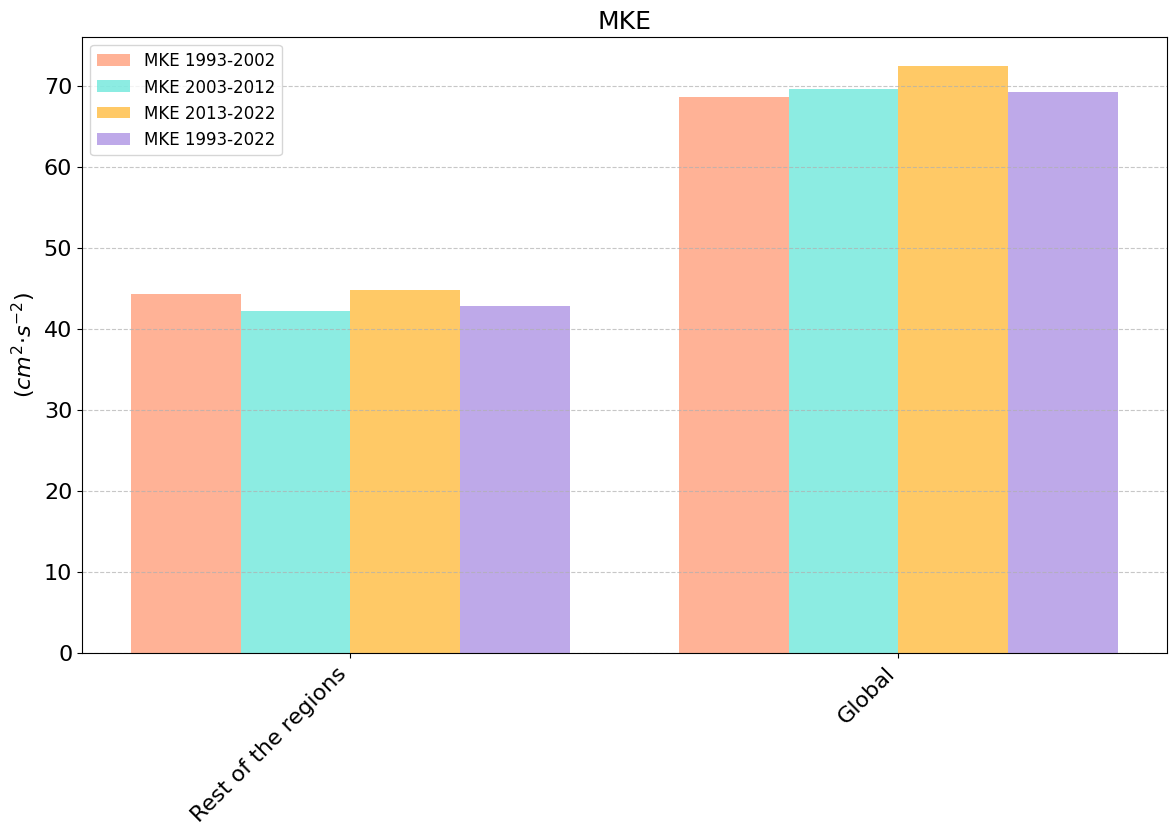

In [28]:
regions = ["Rest of the regions", "Global"]

# Define bar width and positions
width = 0.2 
x = np.arange(len(regions))

fig, ax1 = plt.subplots(figsize=(14, 8))

periods = [
    ("1993-2002", MKE_MEAN_regions_1[-2:], "coral"),
    ("2003-2012",MKE_MEAN_regions_2[-2:] , "turquoise"),
    ("2013-2022", MKE_MEAN_regions_3[-2:], "orange"),
    ("1993-2022", MKE_MEAN_regions[-2:], "mediumpurple")
]


for i, (label, MKE, color) in enumerate(periods):
    bottom = np.zeros(len(regions))  # Reset bottom for stacking
    ax1.bar(x + i * width, MKE, width, label=f"MKE {label}", bottom=bottom, color=color, alpha=0.6)
   # bottom += EKE_ratio  
    


ax1.set_xticks(x + 1.5 * width)
ax1.set_xticklabels(regions, rotation=45, ha="right", fontsize=16)
ax1.set_title("MKE", fontsize=18)
ax1.set_ylabel(r'$(cm^2·s^{-2})$', fontsize=16)
ax1.legend(loc="upper left", fontsize=12)
ax1.grid(axis="y", linestyle="--", alpha=0.7)

plt.yticks(fontsize=16)
plt.show()


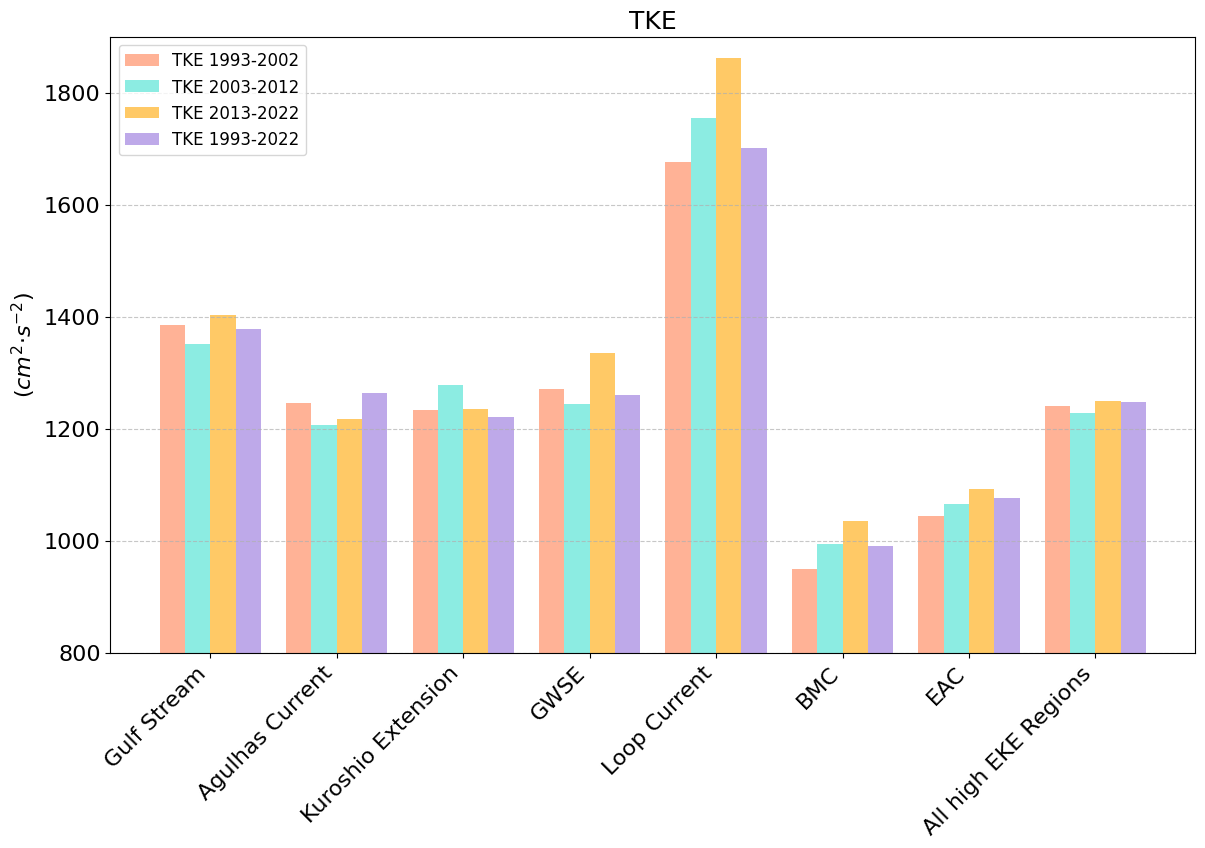

In [29]:
regions = ["Gulf Stream", "Agulhas Current", "Kuroshio Extension", "GWSE", "Loop Current","BMC", "EAC","All high EKE Regions"]#"Rest of the regions", "Global"]

# Define bar width and positions
width = 0.2 
x = np.arange(len(regions))

fig, ax1 = plt.subplots(figsize=(14, 8))

periods = [
    ("1993-2002", mean_TKE_MEAN_regions_1[:-2], "coral"),
    ("2003-2012", mean_TKE_MEAN_regions_2[:-2] , "turquoise"),
    ("2013-2022", mean_TKE_MEAN_regions_3[:-2], "orange"),
    ("1993-2022", mean_TKE_MEAN_regions[:-2], "mediumpurple")
]


for i, (label, TKE, color) in enumerate(periods):
    bottom = np.zeros(len(regions))  # Reset bottom for stacking
    ax1.bar(x + i * width, TKE, width, label=f"TKE {label}", bottom=bottom, color=color, alpha=0.6)
   # bottom += EKE_ratio  
    


ax1.set_xticks(x + 1.5 * width)
ax1.set_xticklabels(regions, rotation=45, ha="right", fontsize=16)
ax1.set_title("TKE", fontsize=18)
ax1.set_ylabel(r'$(cm^2·s^{-2})$', fontsize=16)
ax1.legend(loc="upper left", fontsize=12)
ax1.grid(axis="y", linestyle="--", alpha=0.7)

plt.yticks(fontsize=16)
plt.ylim(800,1900)
plt.show()

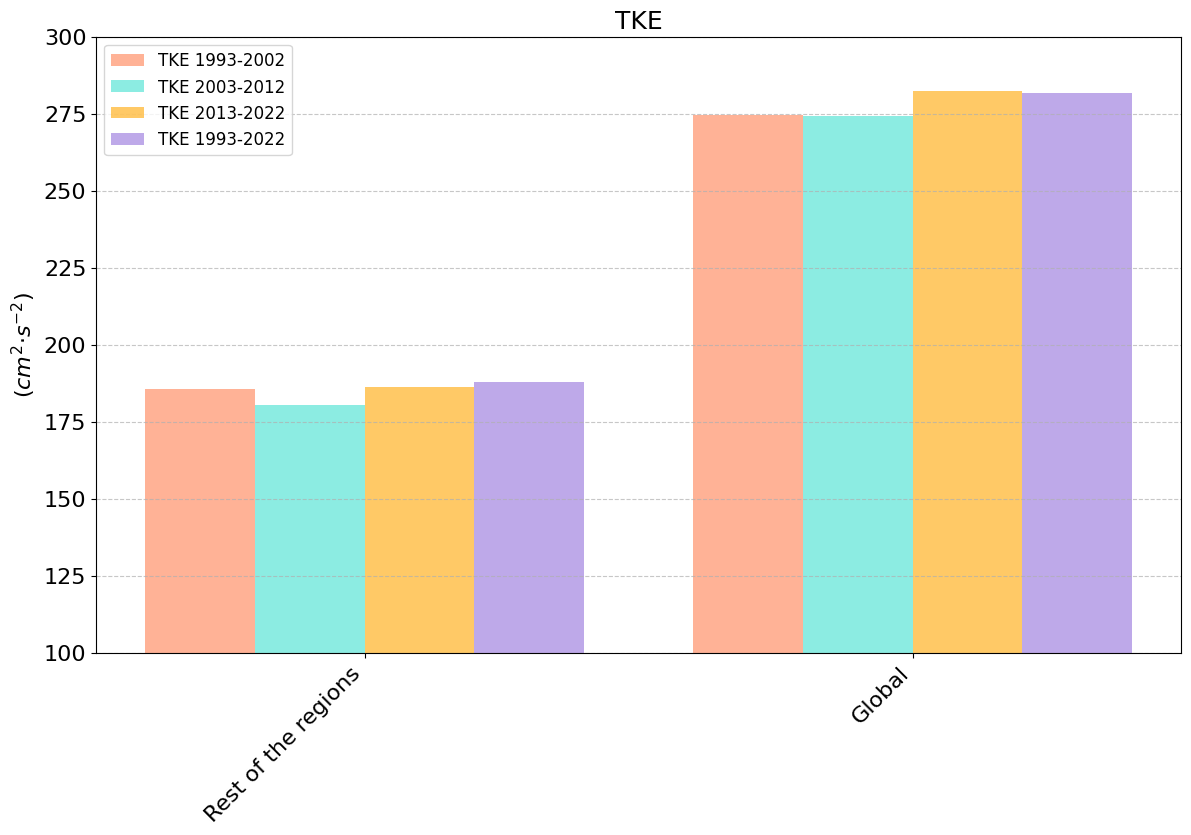

In [ ]:
regions = ["Rest of the regions", "Global"]

# Define bar width and positions
width = 0.2 
x = np.arange(len(regions))

fig, ax1 = plt.subplots(figsize=(14, 8))

periods = [
    ("1993-2002", mean_TKE_MEAN_regions_1[-2:], "coral"),
    ("2003-2012",mean_TKE_MEAN_regions_2[-2:] , "turquoise"),
    ("2013-2022", mean_TKE_MEAN_regions_3[-2:], "orange"),
    ("1993-2022", mean_TKE_MEAN_regions[-2:], "mediumpurple")
]


for i, (label, TKE, color) in enumerate(periods):
    bottom = np.zeros(len(regions))  # Reset bottom for stacking
    ax1.bar(x + i * width, TKE, width, label=f"TKE {label}", bottom=bottom, color=color, alpha=0.6)
   # bottom += EKE_ratio  
    


ax1.set_xticks(x + 1.5 * width)
ax1.set_xticklabels(regions, rotation=45, ha="right", fontsize=16)
ax1.set_title("TKE", fontsize=18)
ax1.set_ylabel(r'$(cm^2·s^{-2})$', fontsize=16)
ax1.legend(loc="upper left", fontsize=12)
ax1.grid(axis="y", linestyle="--", alpha=0.7)

plt.yticks(fontsize=16)
plt.ylim(100,300)
plt.show()


### Contours gulf stream 

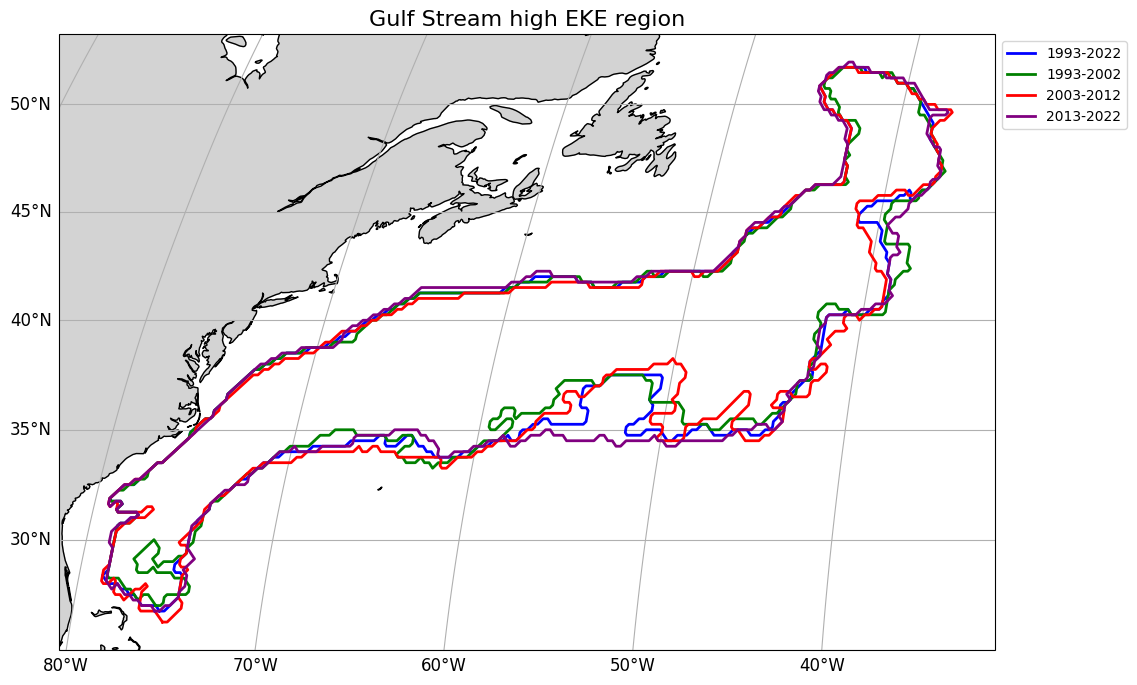

In [31]:
#Draw the contours of the gulf stream for the total period and the three decades in the same plot

plt.figure(figsize=(15, 8))  

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

# Add land and coastline features
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.COASTLINE)

# Improve grid label visibility
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

# Define current colors
colors = {'1993-2022': 'blue', '1993-2002': 'green', '2003-2012': 'red', '2013-2022': 'purple'}

gulf_stream_coords_periods = {
    '1993-2022': gulf_stream_coords,  
    '1993-2002': gulf_stream_coords_1,  
    '2003-2012': gulf_stream_coords_2, 
    '2013-2022': gulf_stream_coords_3   
}
# Plot Gulf Stream coordinates for total period and each decade
for period, coords in gulf_stream_coords_periods.items():
    if coords is not None:
        ax.plot(coords[:, 0], coords[:, 1], label=f'{period}', 
                color=colors.get(period, 'black'), linewidth=2, transform=ccrs.PlateCarree())

plt.title('Gulf Stream high EKE region', fontsize=16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [32]:
#diferencia
mean_EKE_21 = mean_EKE_2 - mean_EKE_1
mean_EKE_31 = mean_EKE_3 - mean_EKE_1
mean_EKE_32 = mean_EKE_3 - mean_EKE_2

mean_TKE_21 = mean_TKE_2 - mean_TKE_1
mean_TKE_31 = mean_TKE_3 - mean_TKE_1
mean_TKE_32 = mean_TKE_3 - mean_TKE_2


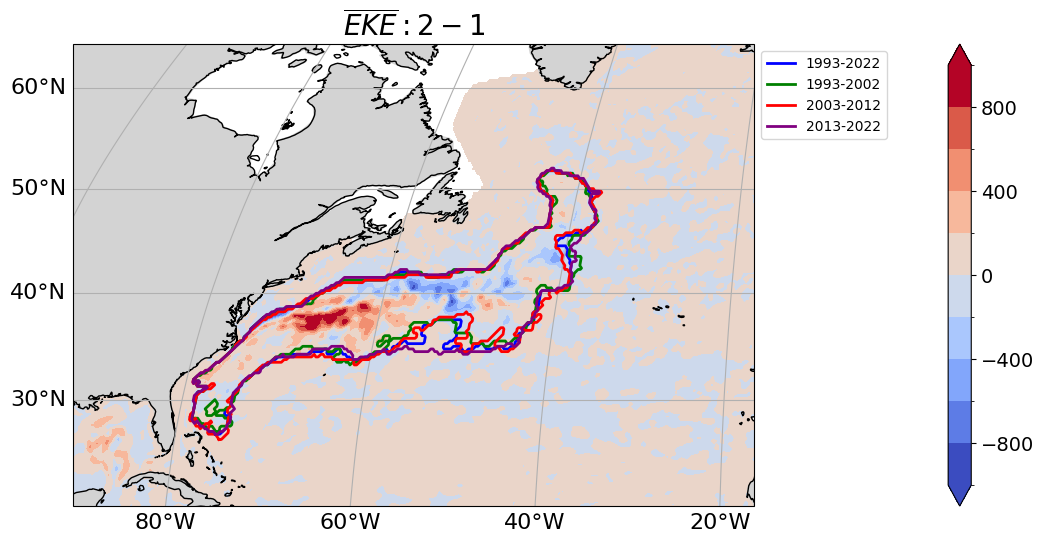

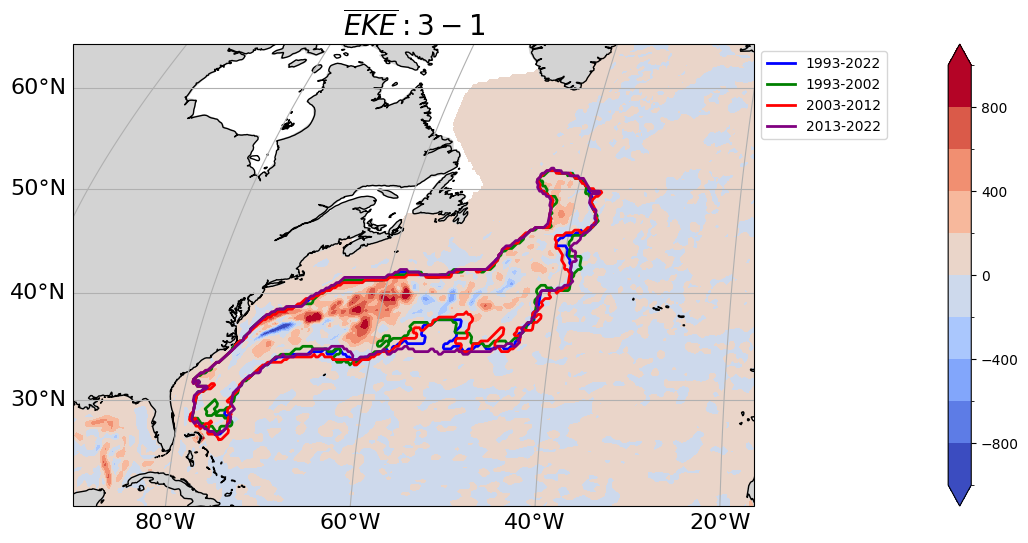

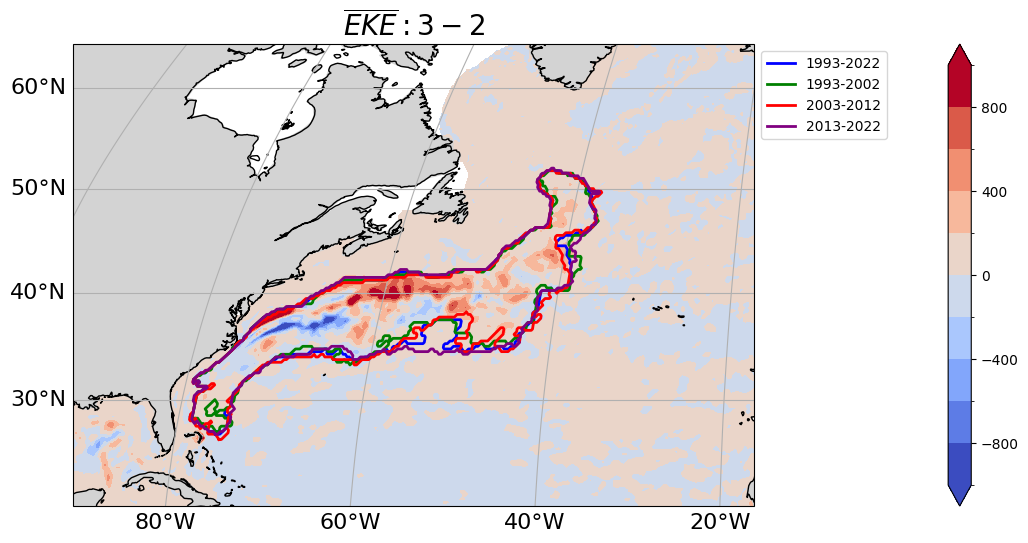

In [39]:
#zoom
plt.figure(figsize=(50, 6))


bounds = [-1000, -800,- 600, -400, -200, 0 , 200, 400, 600, 800, 1000]
cmp = plt.get_cmap('coolwarm')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([-90, -20, 20, 60])

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, mean_EKE_21 , bounds, cmap=cmp, norm=norm, extend='both', transform=ccrs.PlateCarree())

'''
cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)'
'''

cbar = plt.colorbar(contour_plot)
cbar.ax.tick_params(labelsize=14)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{EKE}: 2-1$', fontsize=20)

# Plot Gulf Stream coordinates for total period and each decade
for period, coords in gulf_stream_coords_periods.items():
    if coords is not None:
        ax.plot(coords[:, 0], coords[:, 1], label=f'{period}', 
                color=colors.get(period, 'black'), linewidth=2, transform=ccrs.PlateCarree())

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()






plt.figure(figsize=(50, 6))


bounds = [-1000, -800,- 600, -400, -200, 0 , 200, 400, 600, 800, 1000]
cmp = plt.get_cmap('coolwarm')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([-90, -20, 20, 60])

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, mean_EKE_31 , bounds, cmap=cmp, norm=norm, extend='both', transform=ccrs.PlateCarree())



plt.colorbar(contour_plot)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{EKE}: 3-1$', fontsize=20)


# Plot Gulf Stream coordinates for total period and each decade
for period, coords in gulf_stream_coords_periods.items():
    if coords is not None:
        ax.plot(coords[:, 0], coords[:, 1], label=f'{period}', 
                color=colors.get(period, 'black'), linewidth=2, transform=ccrs.PlateCarree())

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()






plt.figure(figsize=(50, 6))


bounds = [-1000, -800,- 600, -400, -200, 0 , 200, 400, 600, 800, 1000]
cmp = plt.get_cmap('coolwarm')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([-90, -20, 20, 60])

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, mean_EKE_32 , bounds, cmap=cmp, norm=norm, extend='both', transform=ccrs.PlateCarree())



plt.colorbar(contour_plot)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{EKE}: 3-2$', fontsize=20)


# Plot Gulf Stream coordinates for total period and each decade
for period, coords in gulf_stream_coords_periods.items():
    if coords is not None:
        ax.plot(coords[:, 0], coords[:, 1], label=f'{period}', 
                color=colors.get(period, 'black'), linewidth=2, transform=ccrs.PlateCarree())

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


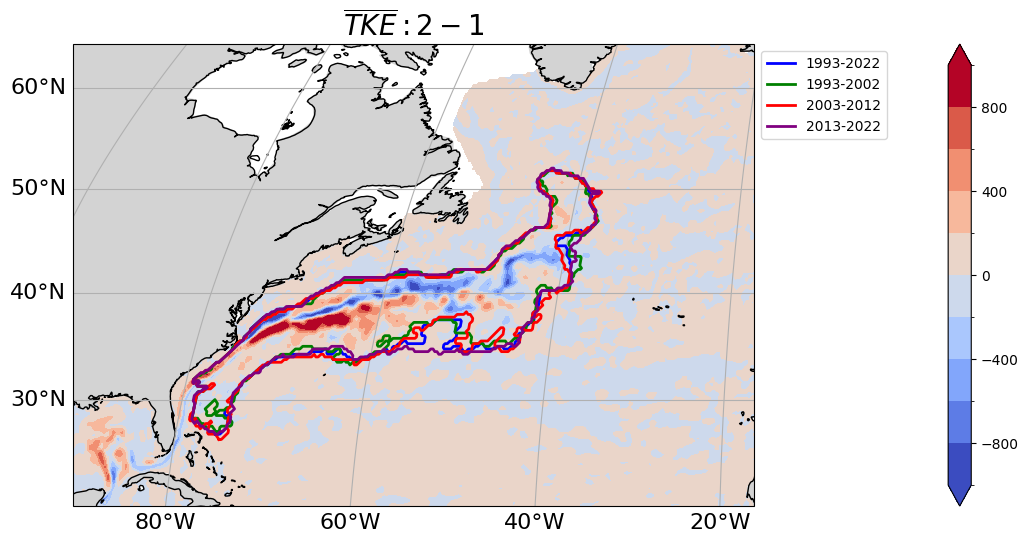

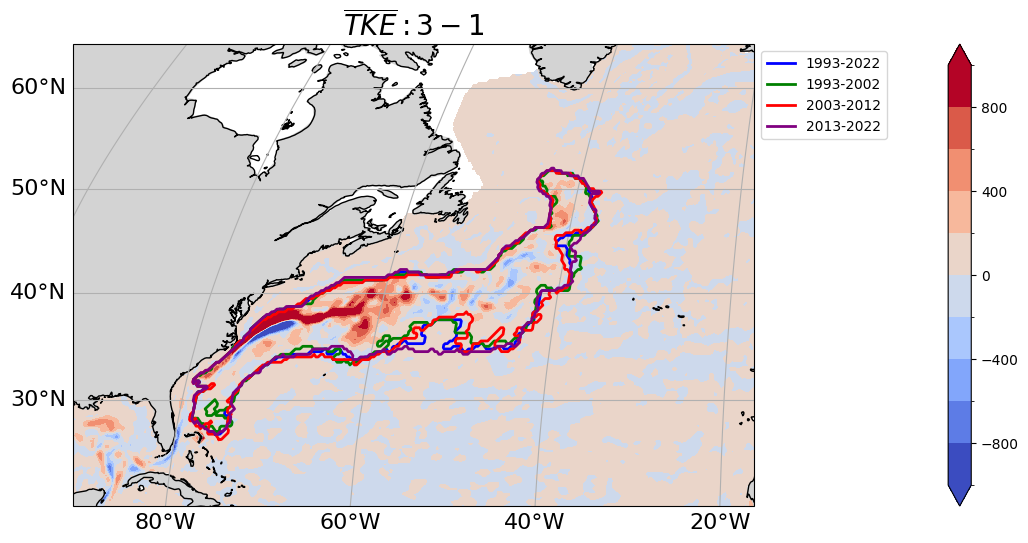

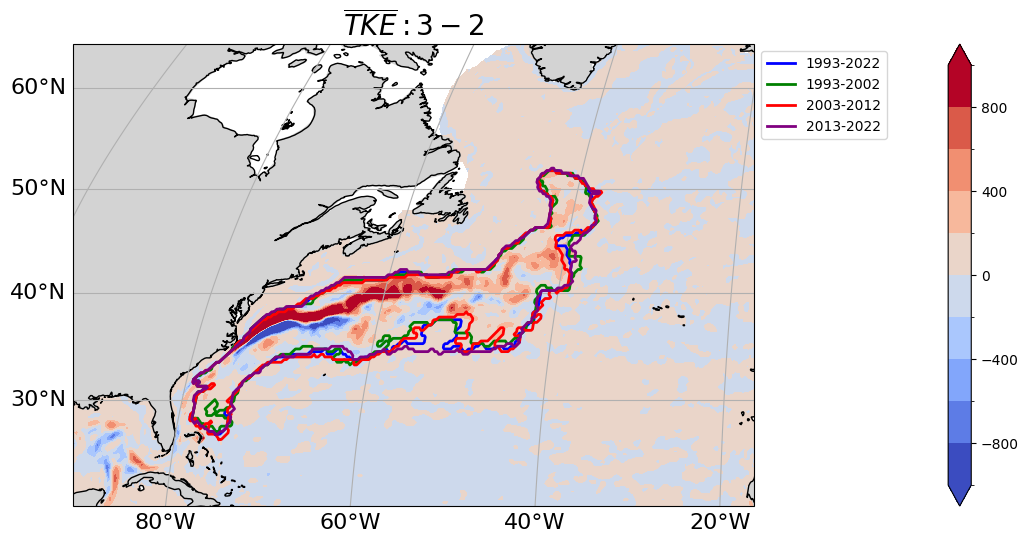

In [40]:
#zoom
plt.figure(figsize=(50, 6))


bounds = [-1000, -800,- 600, -400, -200, 0 , 200, 400, 600, 800, 1000]
cmp = plt.get_cmap('coolwarm')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([-90, -20, 20, 60])

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, mean_TKE_21 , bounds, cmap=cmp, norm=norm, extend='both', transform=ccrs.PlateCarree())

'''
cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)'
'''

plt.colorbar(contour_plot)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{TKE}: 2-1$', fontsize=20)

# Plot Gulf Stream coordinates for total period and each decade
for period, coords in gulf_stream_coords_periods.items():
    if coords is not None:
        ax.plot(coords[:, 0], coords[:, 1], label=f'{period}', 
                color=colors.get(period, 'black'), linewidth=2, transform=ccrs.PlateCarree())

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



plt.figure(figsize=(50, 6))


bounds = [-1000, -800,- 600, -400, -200, 0 , 200, 400, 600, 800, 1000]
cmp = plt.get_cmap('coolwarm')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([-90, -20, 20, 60])

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, mean_TKE_31 , bounds, cmap=cmp, norm=norm, extend='both', transform=ccrs.PlateCarree())

'''
cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)'
'''

plt.colorbar(contour_plot)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{TKE}: 3-1$', fontsize=20)

# Plot Gulf Stream coordinates for total period and each decade
for period, coords in gulf_stream_coords_periods.items():
    if coords is not None:
        ax.plot(coords[:, 0], coords[:, 1], label=f'{period}', 
                color=colors.get(period, 'black'), linewidth=2, transform=ccrs.PlateCarree())

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()




plt.figure(figsize=(50, 6))


bounds = [-1000, -800,- 600, -400, -200, 0 , 200, 400, 600, 800, 1000]
cmp = plt.get_cmap('coolwarm')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([-90, -20, 20, 60])

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, mean_TKE_32 , bounds, cmap=cmp, norm=norm, extend='both', transform=ccrs.PlateCarree())

'''
cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)'
'''

plt.colorbar(contour_plot)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{TKE}: 3-2$', fontsize=20)

# Plot Gulf Stream coordinates for total period and each decade
for period, coords in gulf_stream_coords_periods.items():
    if coords is not None:
        ax.plot(coords[:, 0], coords[:, 1], label=f'{period}', 
                color=colors.get(period, 'black'), linewidth=2, transform=ccrs.PlateCarree())

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
